In [52]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling import models, fitting
import lightkurve as lk


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

TIC 62331575
0.940007364048701 d


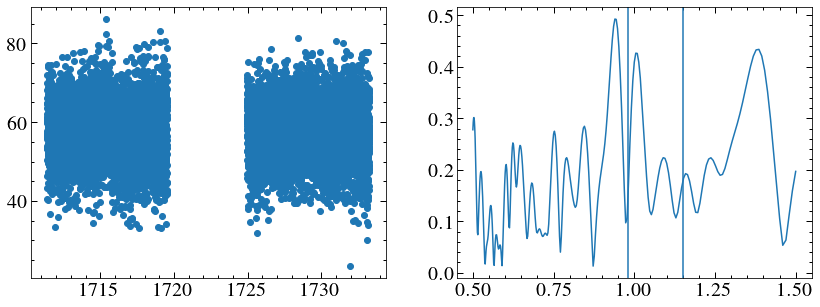

TIC 63445000
1.3518874252763855 d


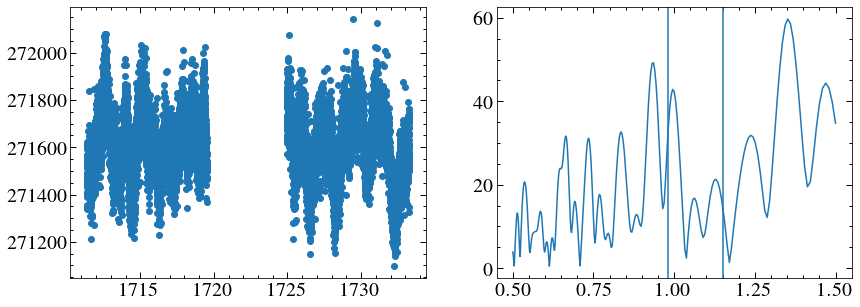

TIC 62601811
0.8939735280789185 d


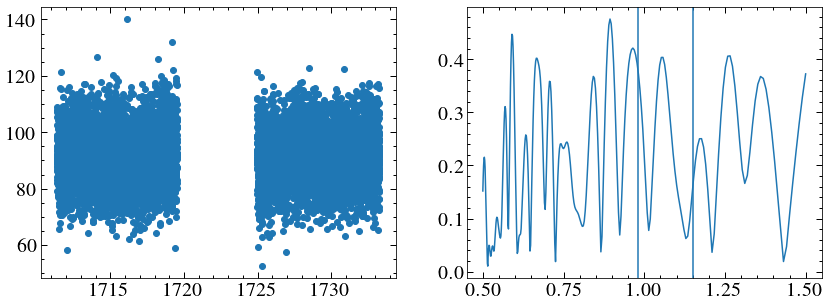

TIC 358183868
1.1006444422886985 d


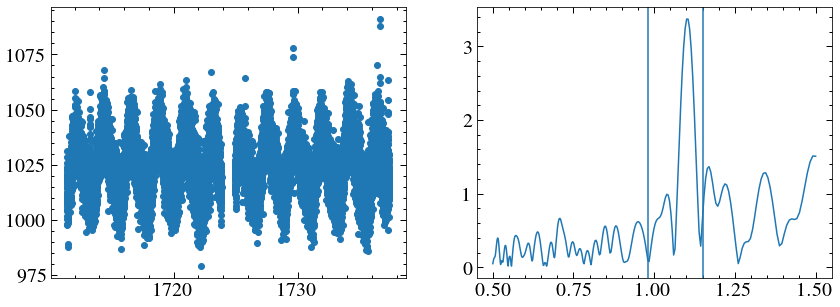

TIC 259778906
0.9648489320259265 d


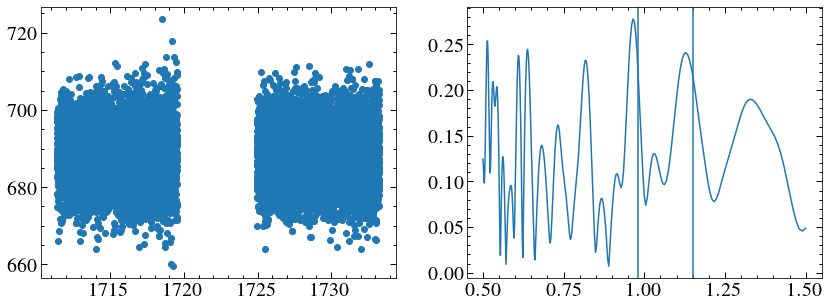

TIC 63328020
0.5534004685955959 d


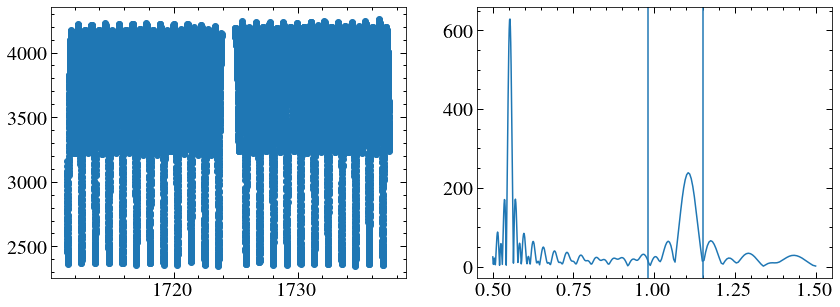

TIC 357874605
1.0683736846979746 d


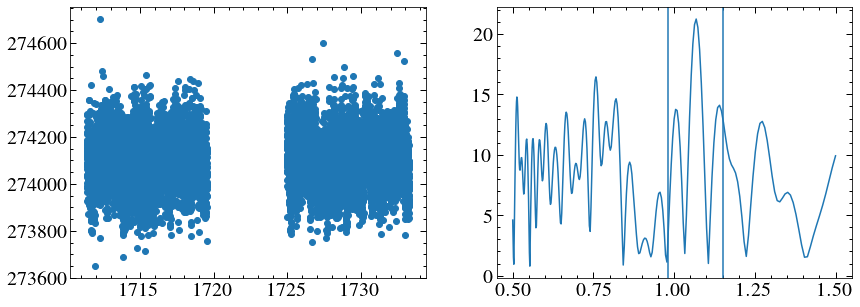

TIC 358623528
1.1117510444974388 d


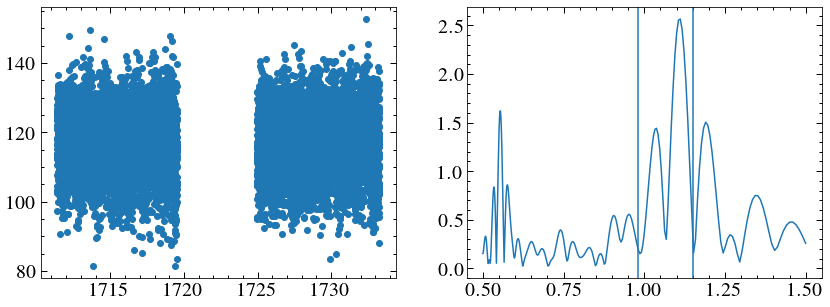

TIC 63159328
0.7526770599707179 d


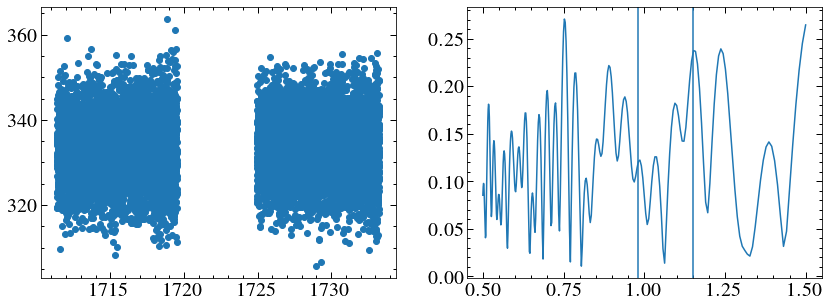

TIC 358323393
1.5 d


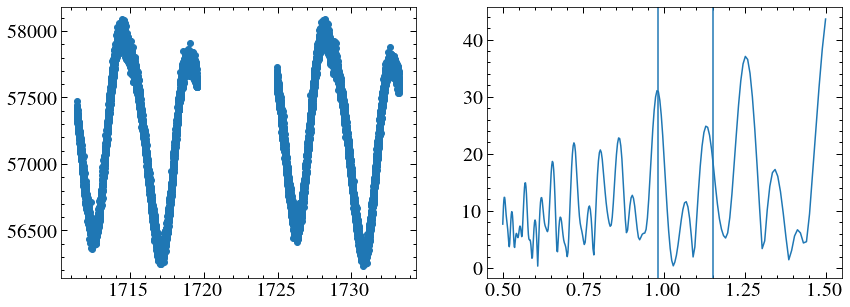

TIC 62137012
0.8721362447439056 d


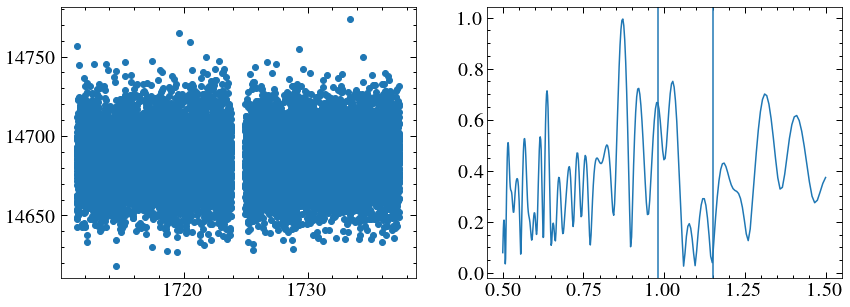

TIC 259570718
0.6842508010973622 d


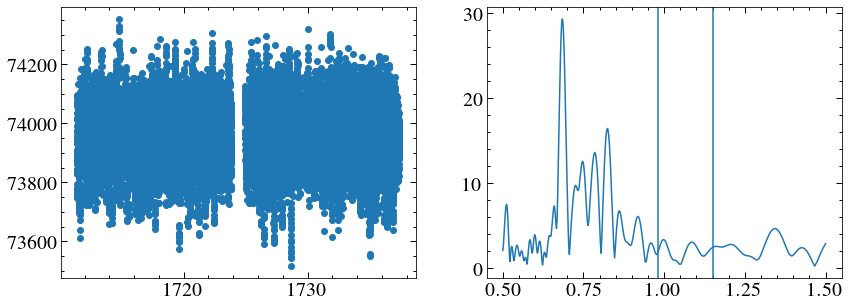

TIC 289903576
1.169857499548619 d


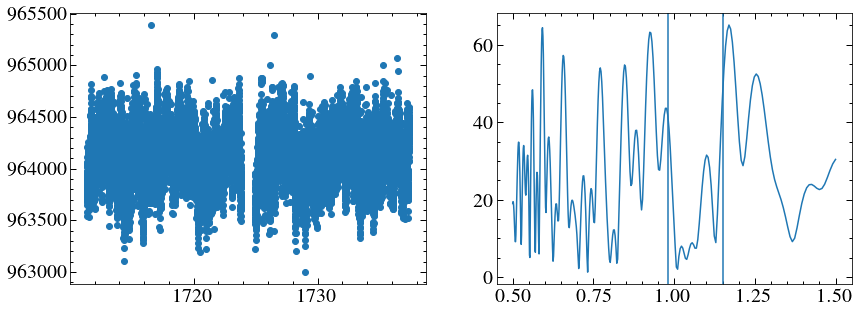

TIC 267145353
1.331315267282447 d


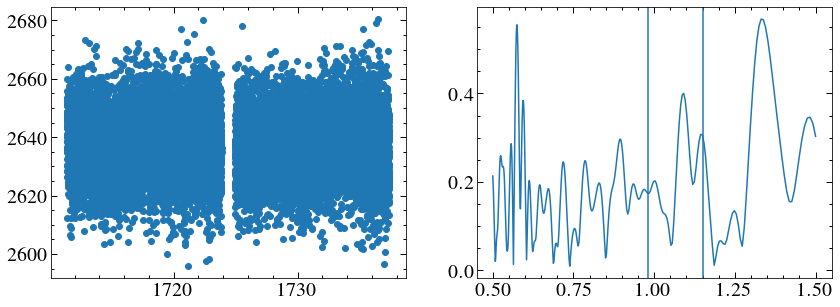

TIC 63529352
1.4313900081521613 d


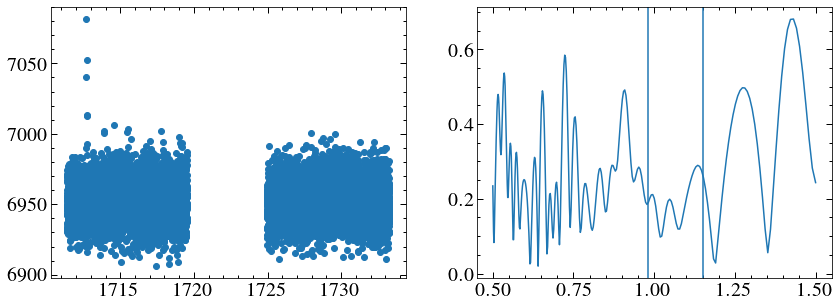

TIC 62871416
1.3193194090525235 d


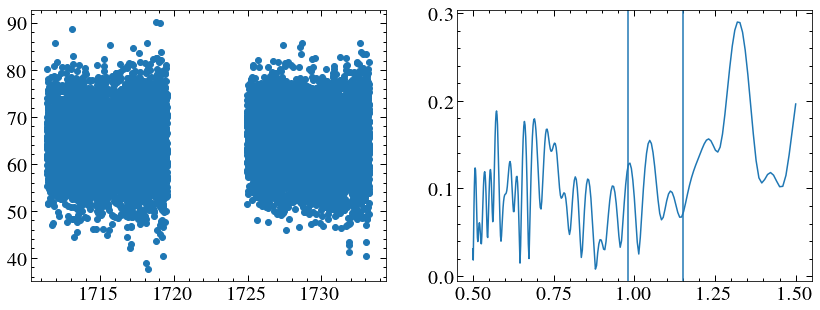

TIC 62775649
1.082349355771216 d


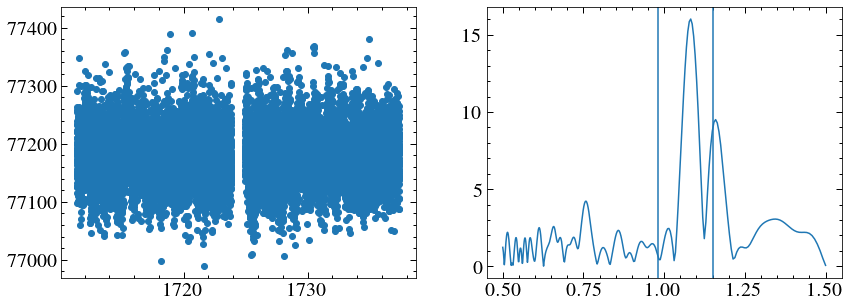

TIC 290277380
1.0646508600012063 d


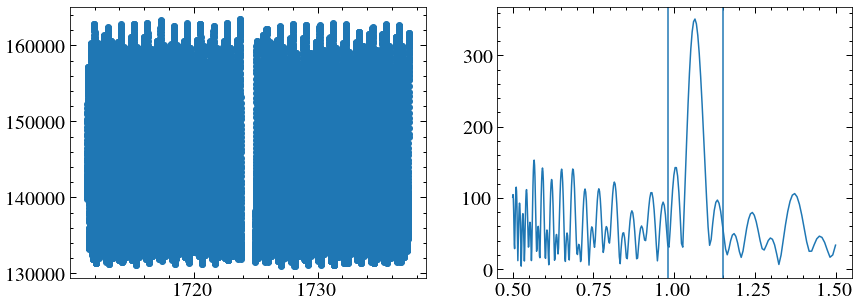

TIC 387572309
1.1858374553872246 d


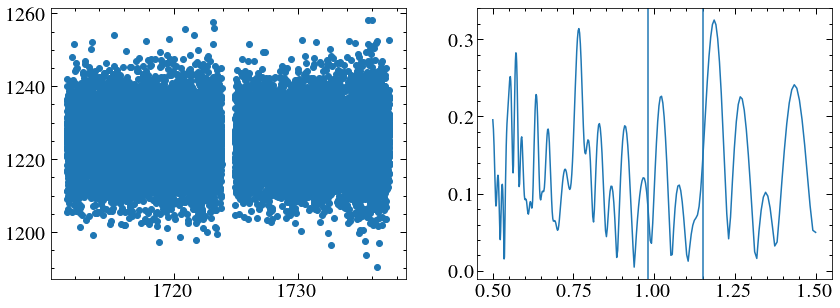

TIC 358738822
0.9247801053191765 d


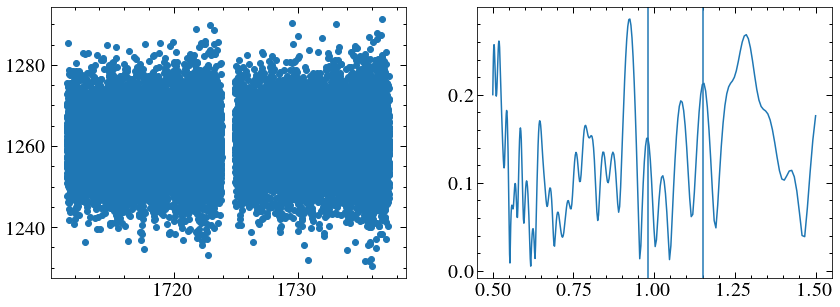

TIC 62690967
1.1195705067379924 d


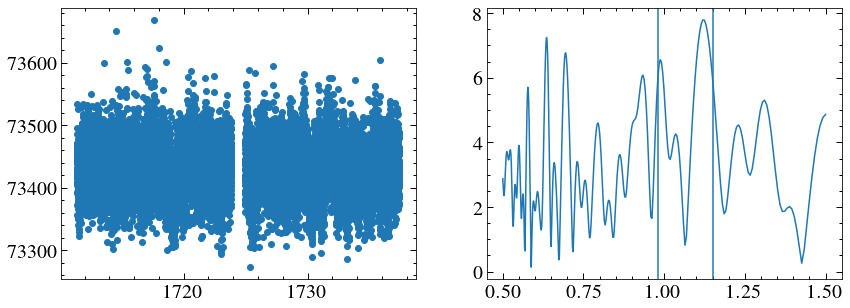

TIC 63445485
0.6000959318261849 d


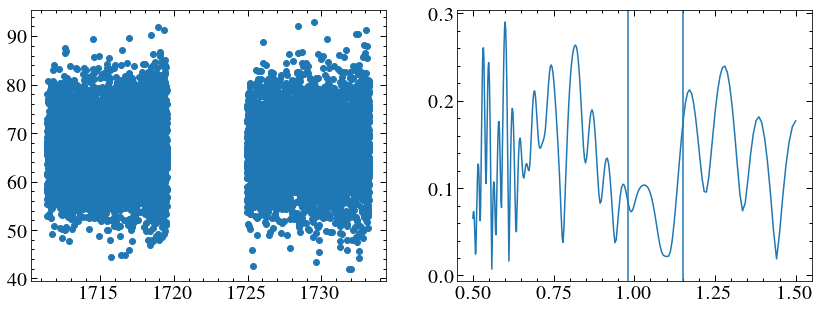

TIC 63853144
0.8047659884690709 d


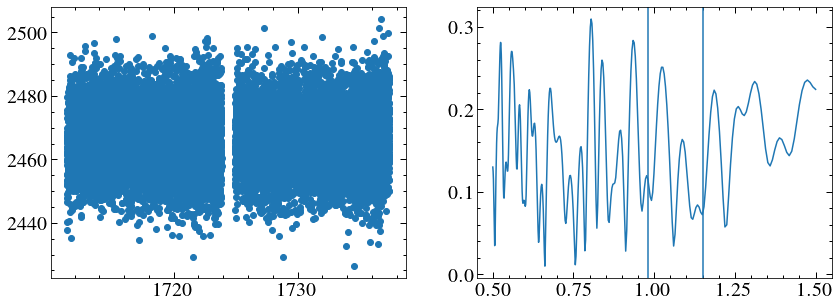

TIC 62247360
1.4129249703960813 d


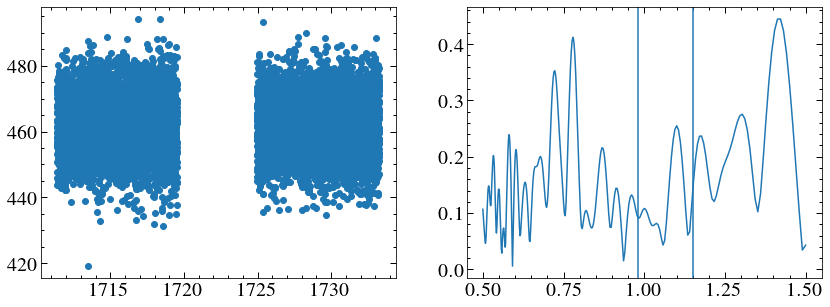

TIC 62337539
1.3591046910327178 d


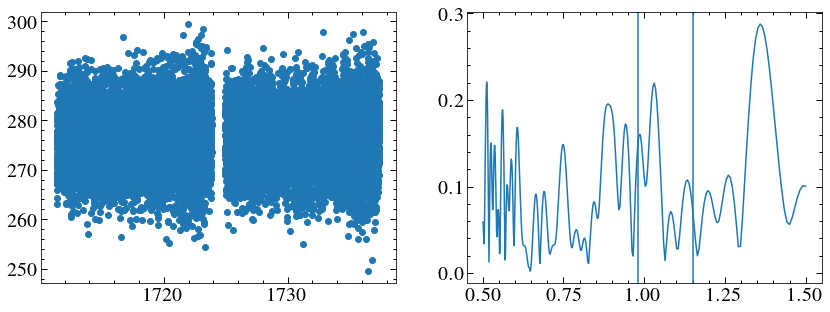

TIC 62872846
1.0736107274032665 d


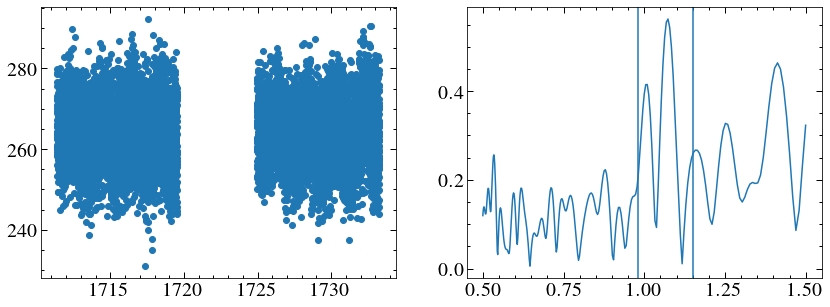

TIC 358626366
1.479734999735091 d


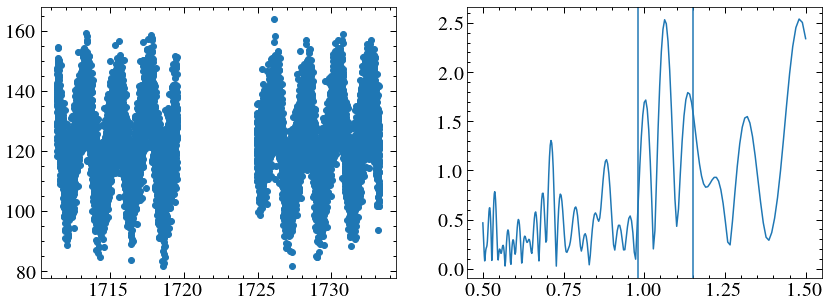

TIC 277732561
1.3955163222920117 d


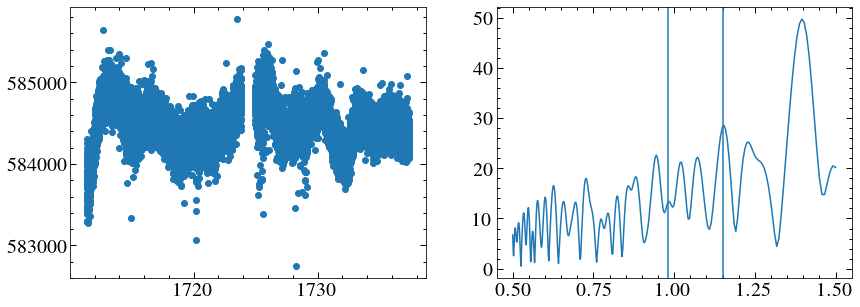

TIC 62600417
1.216727696796952 d


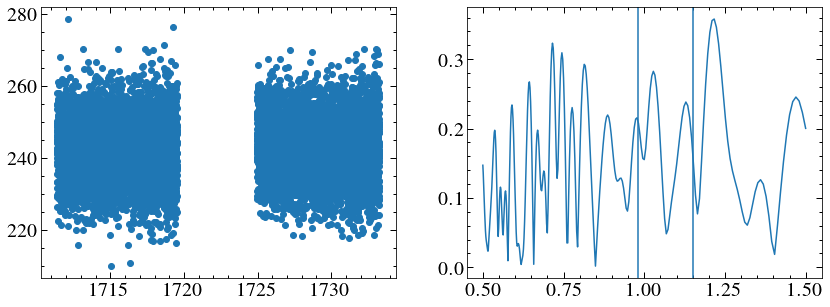

TIC 63223709
0.7204946734548126 d


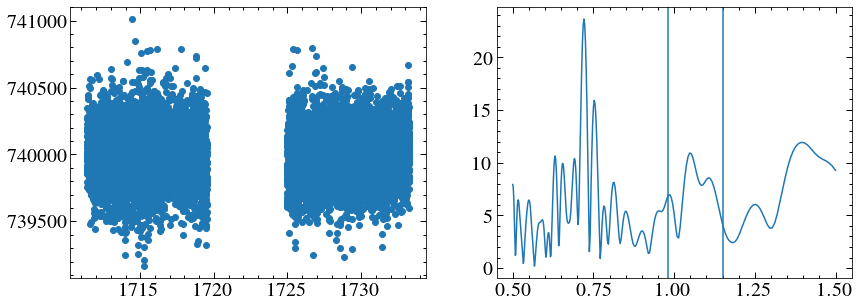

TIC 290232858
1.0690206299100773 d


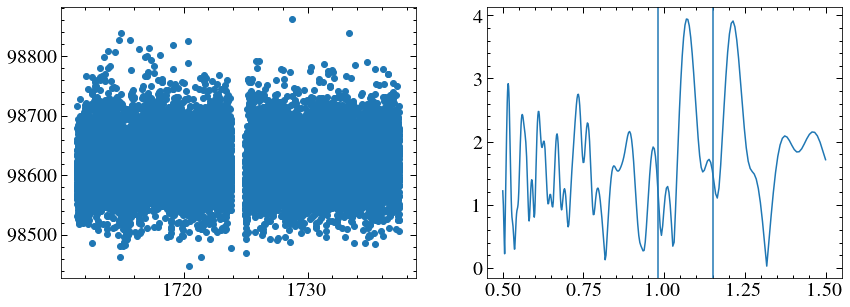

TIC 62236403
1.2727622210010174 d


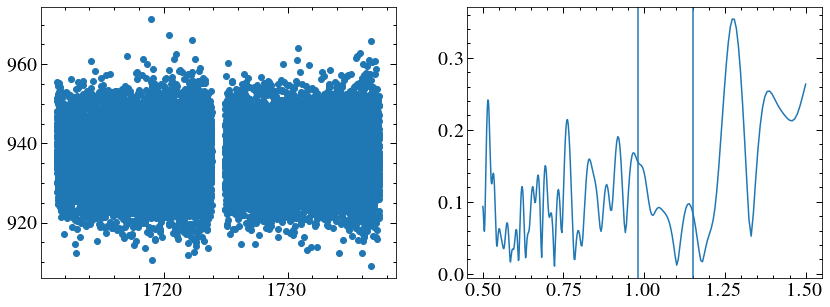

TIC 62859749
1.5 d


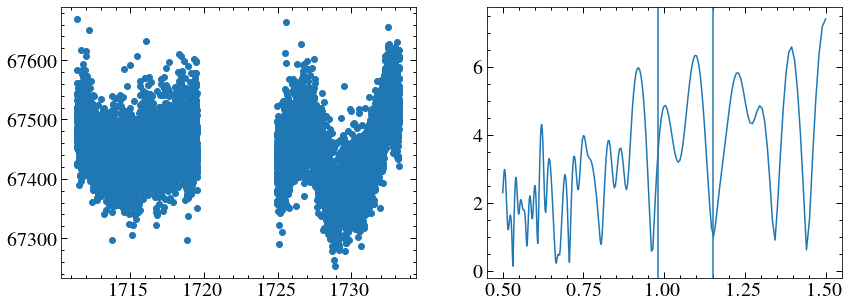

TIC 277247794
1.4897986287870375 d


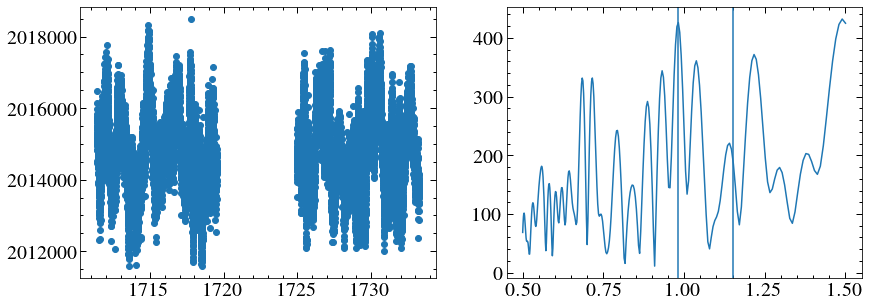

TIC 1976127759
1.5 d


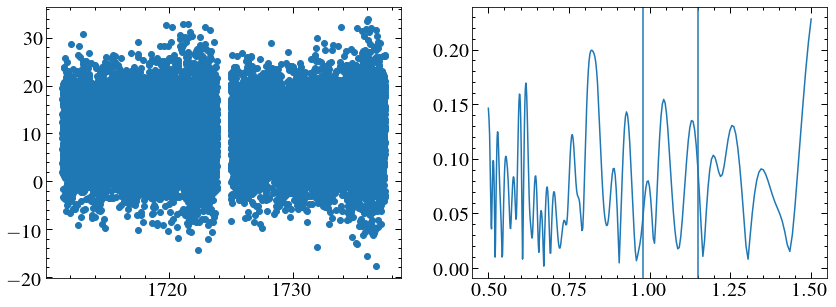

TIC 1976186546
1.0646515328692074 d


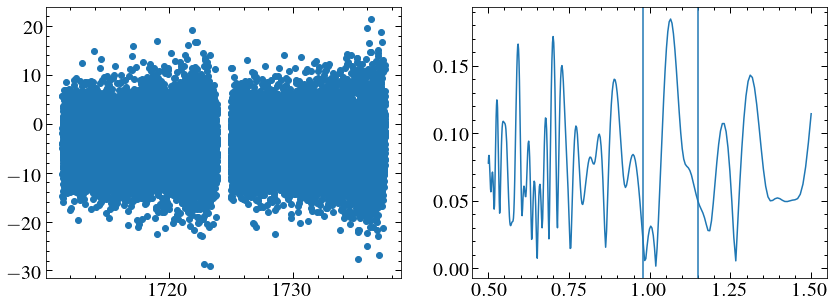

TIC 63231675
0.6860536467897286 d


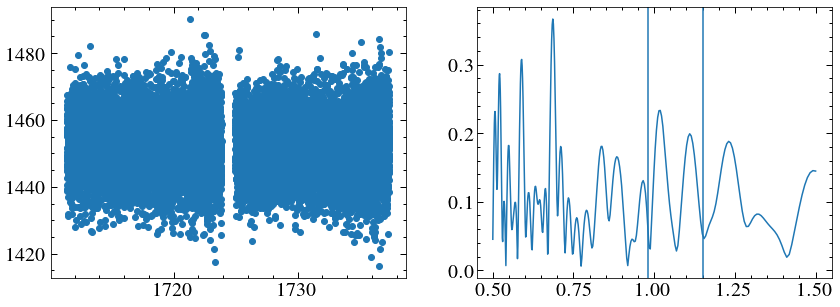

TIC 267267344
1.242404612829714 d


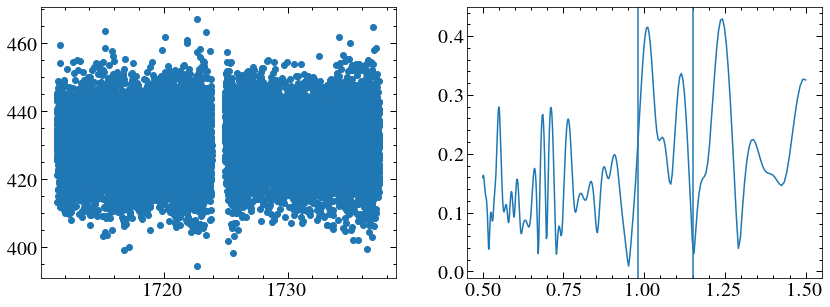

TIC 289901202
0.9182583643146519 d


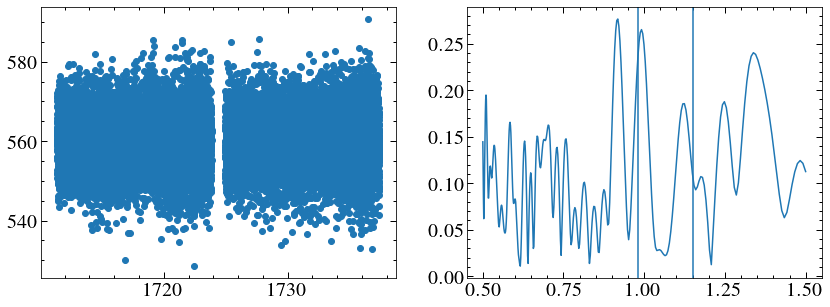

TIC 358739842
0.5569496741406661 d


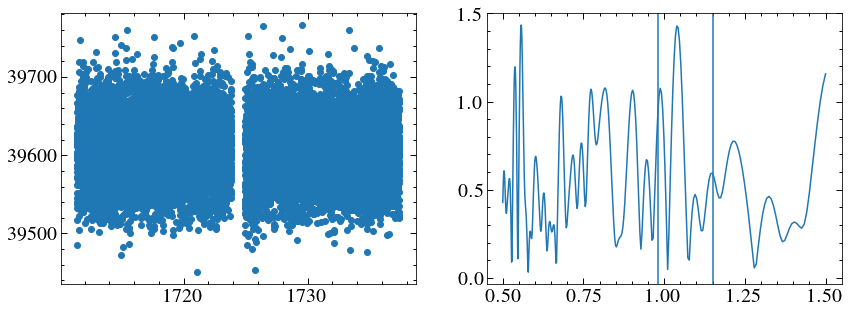

TIC 259773610
1.144161717944707 d


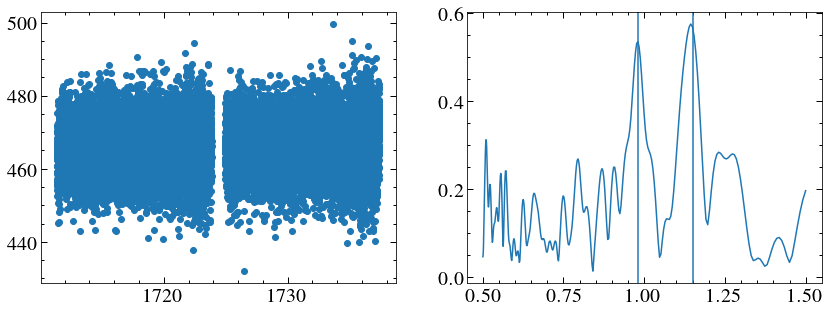

TIC 267147831
1.1006443443048082 d


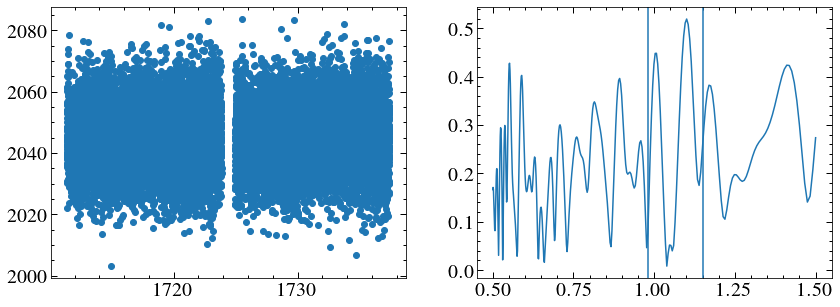

TIC 357875887
0.5818333092873226 d


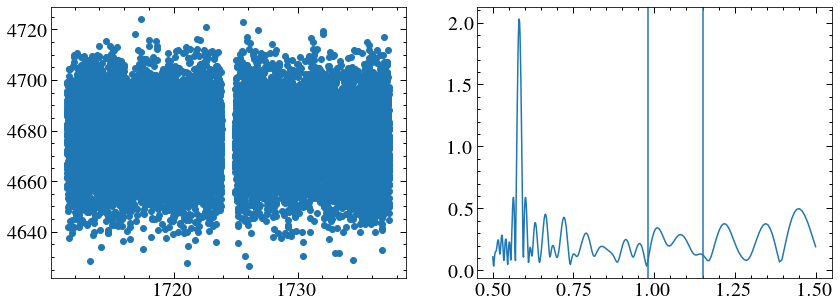

TIC 416687457
1.009303752847342 d


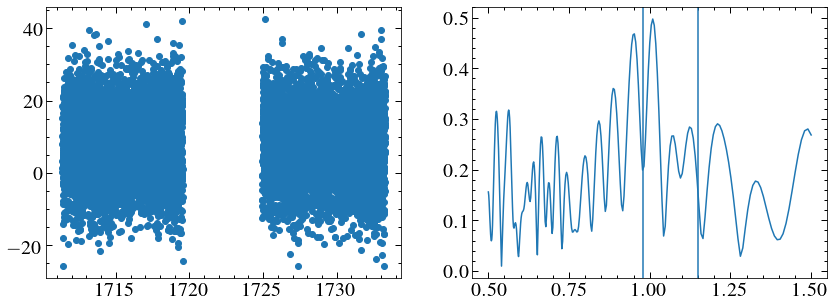

TIC 62329245
1.106137689083947 d


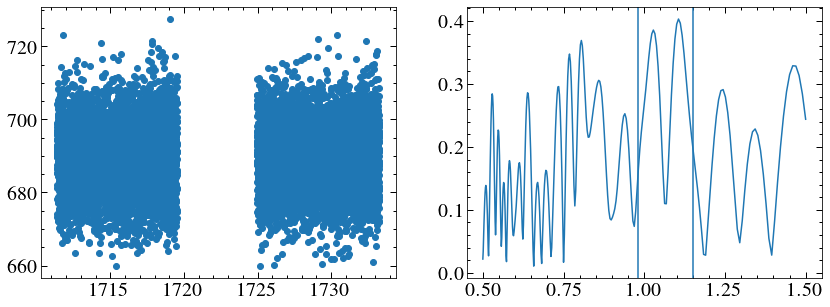

TIC 358742213
1.1967350969078188 d


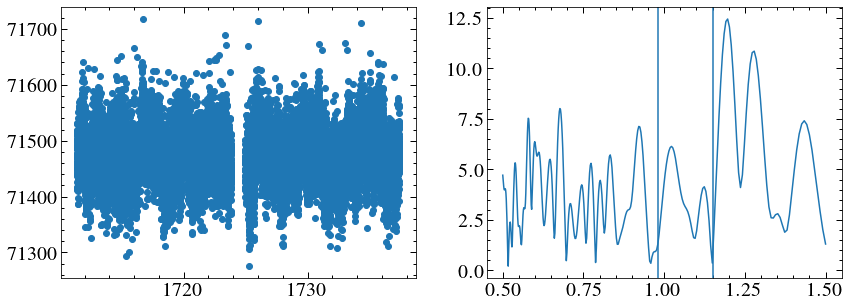

TIC 259285607
1.3520489531575213 d


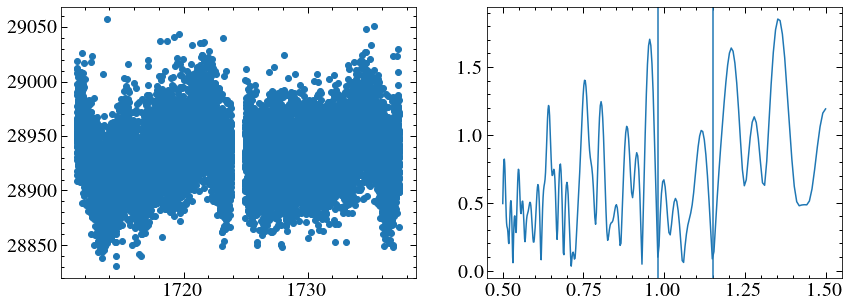

TIC 63152193
1.4030338271599914 d


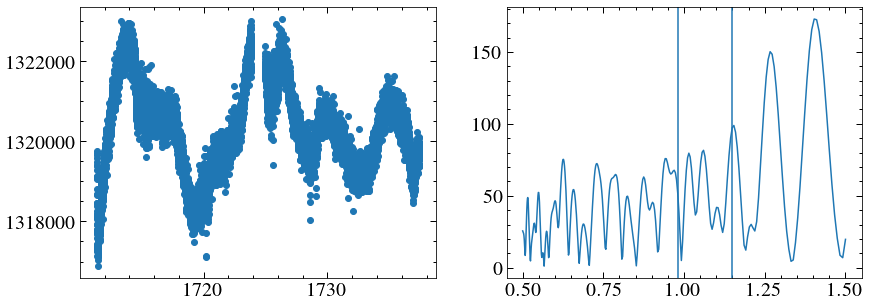

TIC 289779542
1.2916987818191332 d


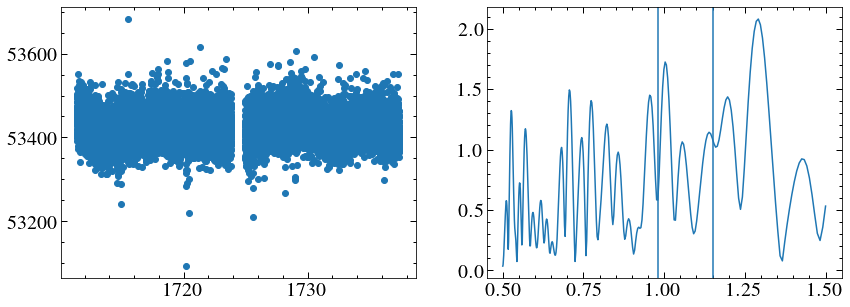

TIC 358736833
1.2306637565384368 d


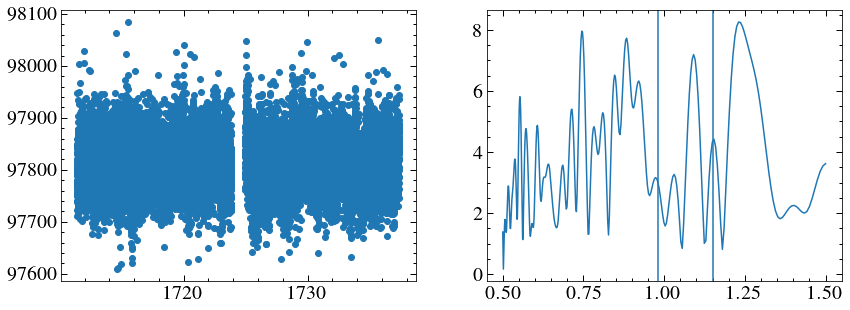

TIC 62778085
1.2665729083233686 d


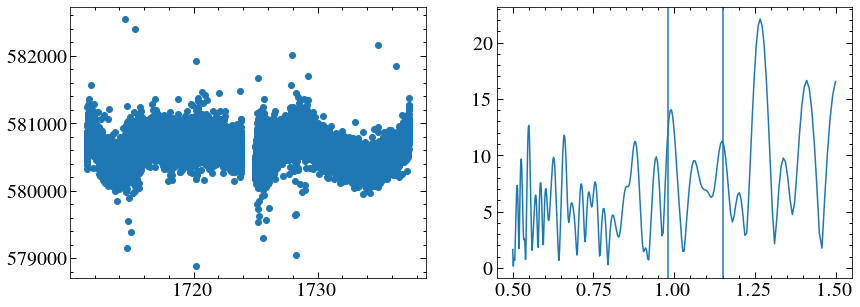

TIC 62949855
0.7691174640326518 d


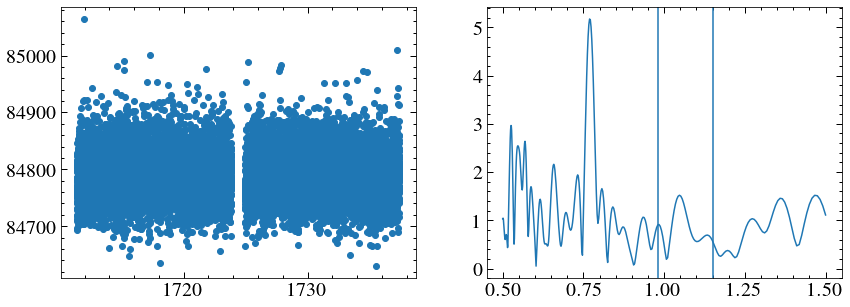

TIC 259779917
1.117422426943402 d


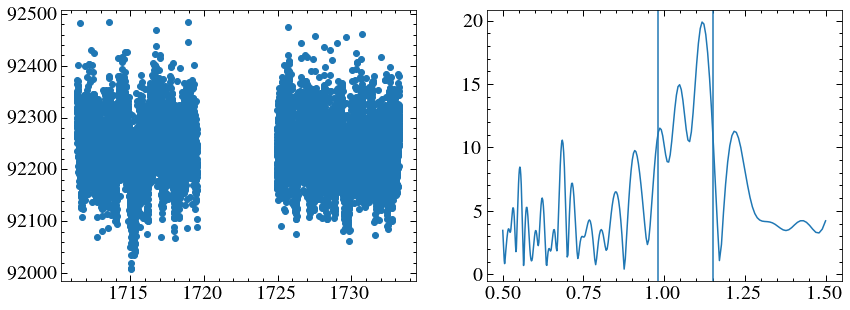

TIC 63711629
1.5 d


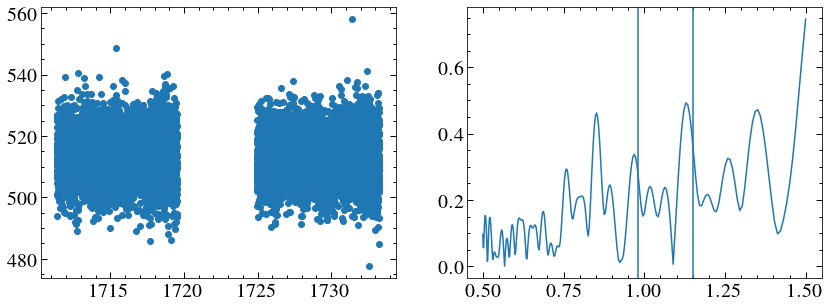

TIC 290228730
1.1967344408838063 d


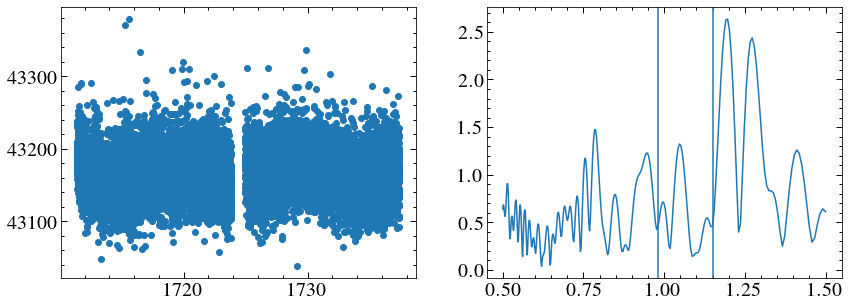

TIC 416749916
0.5654135294080568 d


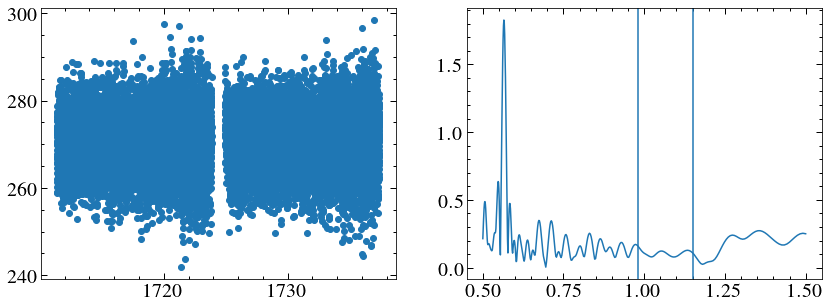

TIC 267152671
0.5041250331771848 d


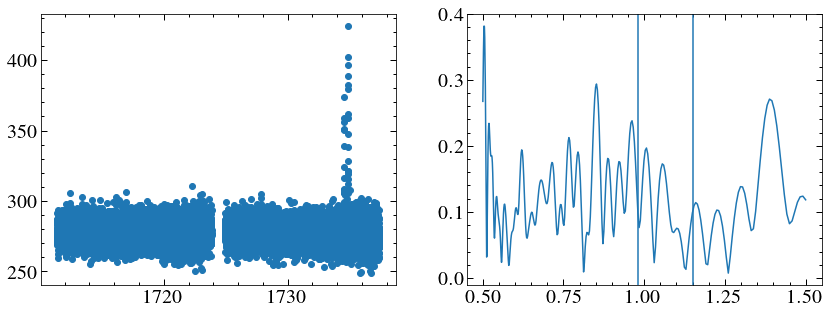

TIC 267281807
1.1902820427296554 d


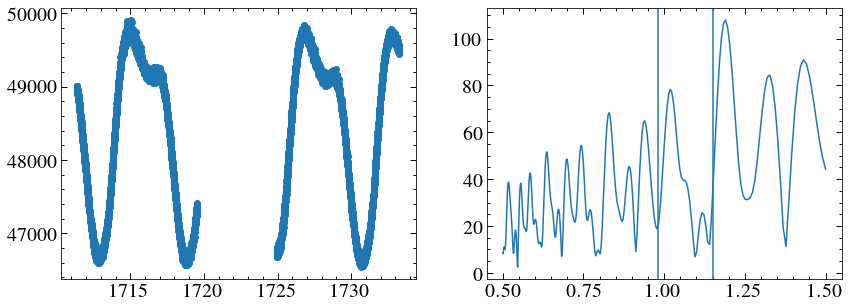

TIC 62774646
1.5 d


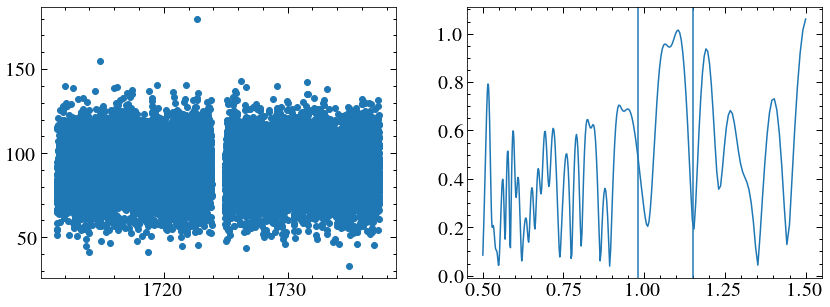

TIC 62598633
0.5058626264398594 d


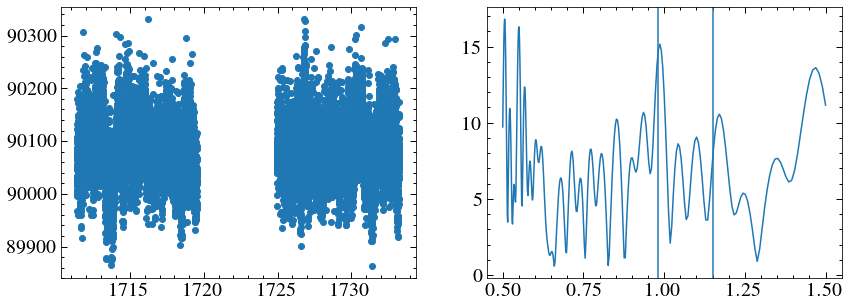

TIC 358634889
0.7157851787171052 d


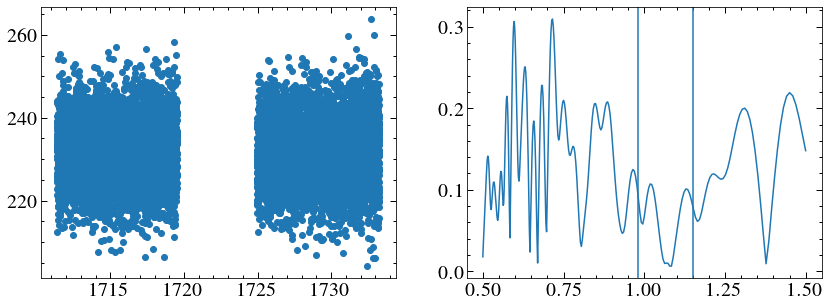

TIC 63531472
0.5517303845463299 d


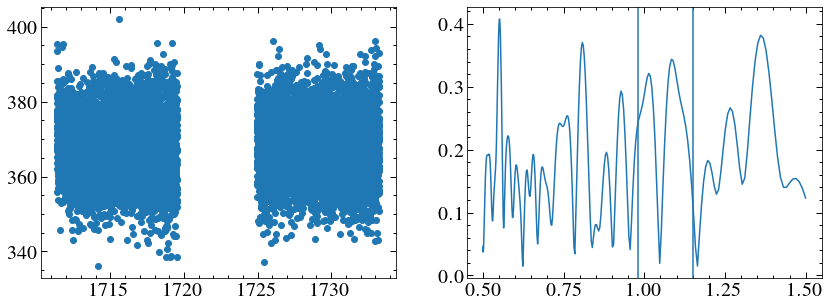

TIC 358420231
0.6133488560751942 d


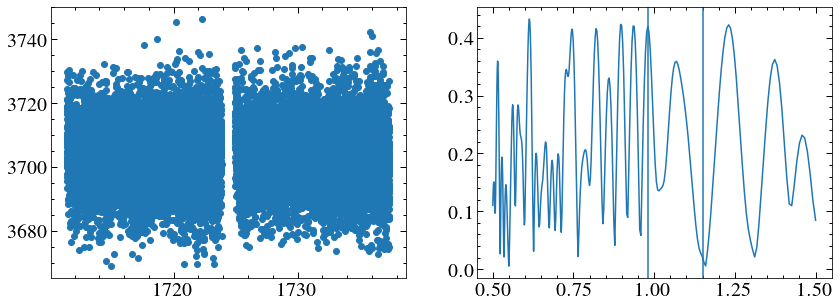

TIC 63441620
1.4220976457068175 d


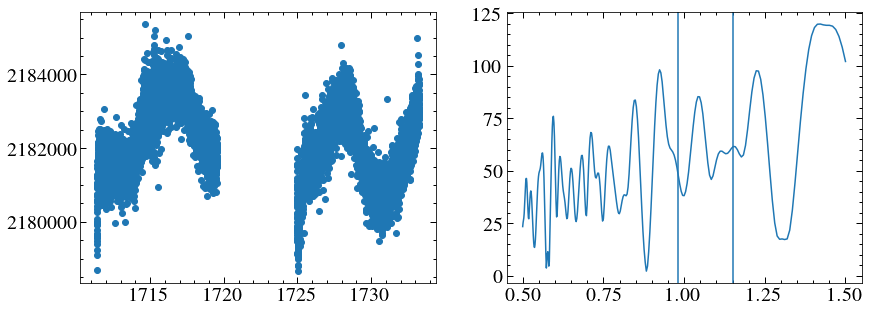

TIC 387477065
1.4914104928363634 d


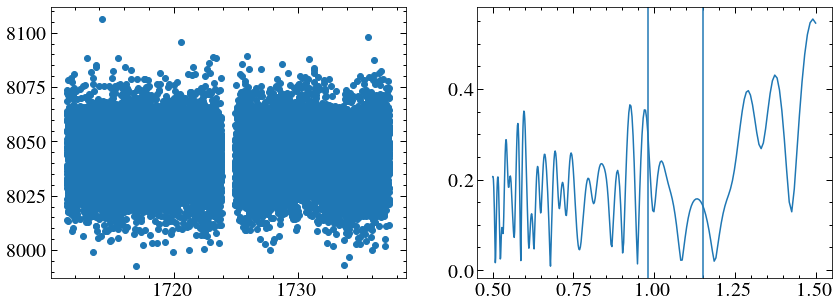

TIC 63222474
1.2033601891742953 d


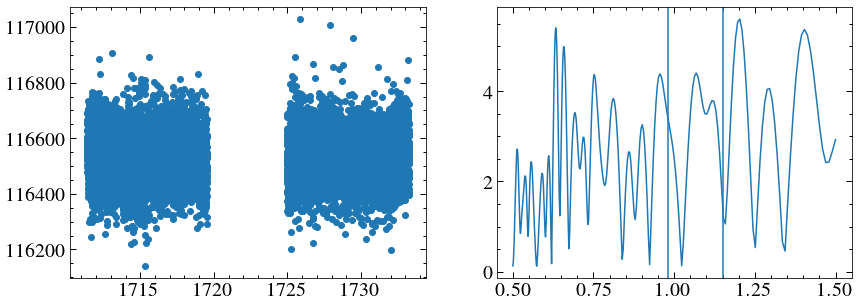

In [82]:
npath = 'nearby_stars/c15_stars/TESS/'
sfiles = os.listdir(npath)
for s in sfiles:
    ft = glob.glob(npath+s+'/*lc.fits')
    if len(ft) >0:
        ft=ft[0]
        data = fits.getdata(ft, 1)
        t, f, e, q = data['TIME'], data['PDCSAP_FLUX'], data['PDCSAP_FLUX_ERR'], data['QUALITY']
        t, f, e = t[q==0], f[q==0], e[q==0]
        plt.subplot(121)
        plt.scatter(t, f)
        print(fits.getheader(ft)['OBJECT'])
        #plt.show()
        lc = lk.LightCurve(time=t, flux=f, flux_err=e ).remove_outliers(sigma=5)
        pg = lc.to_periodogram(oversample_factor=10,minimum_period=0.5*u.day, maximum_period=1.5*u.day)
        plt.subplot(122)
        plt.plot(pg.period, pg.power)
        plt.axvline(1.15)
        plt.axvline(0.98)
        print(pg.period_at_max_power)
        plt.show()

    

TIC 277732561
1.4809320547095464 d


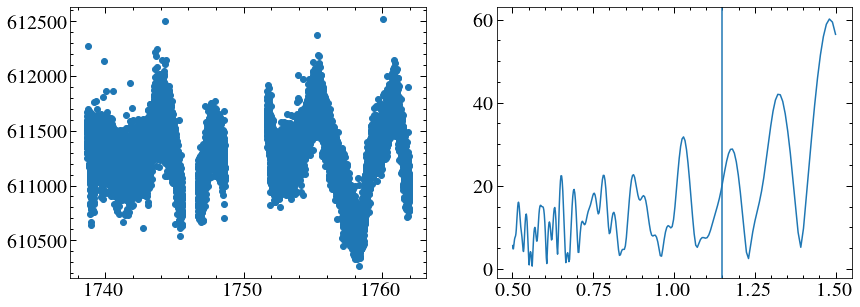

TIC 387572309
0.9470952622249289 d


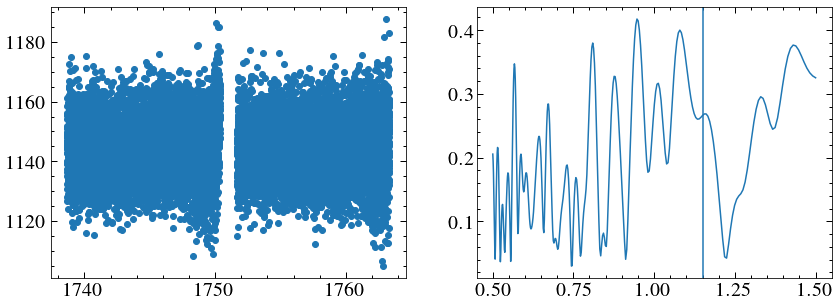

TIC 358420231
0.9398779854589259 d


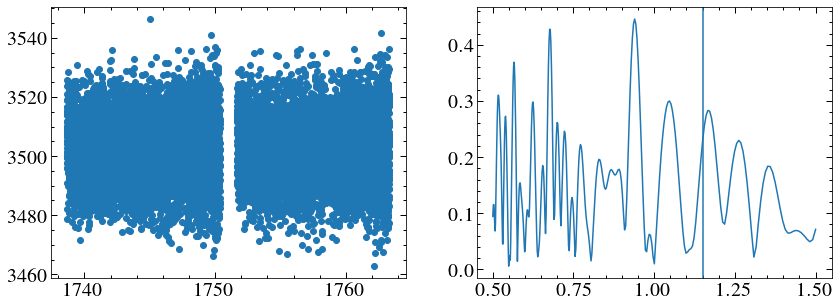

TIC 259570718
0.7419754126151729 d


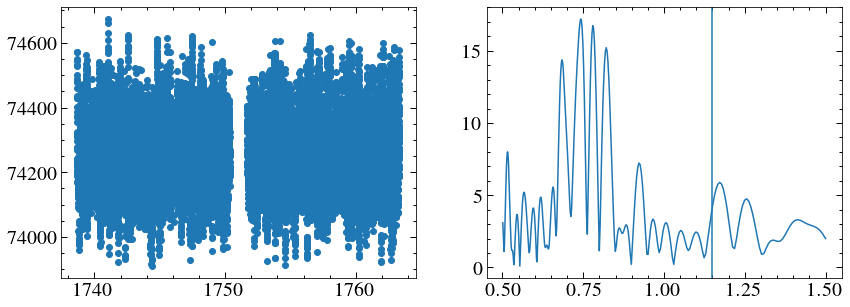

TIC 63159328
0.6688952994996932 d


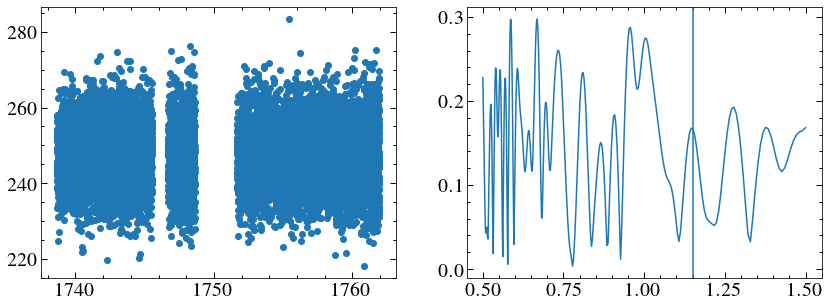

TIC 358325879
1.2685689445162 d


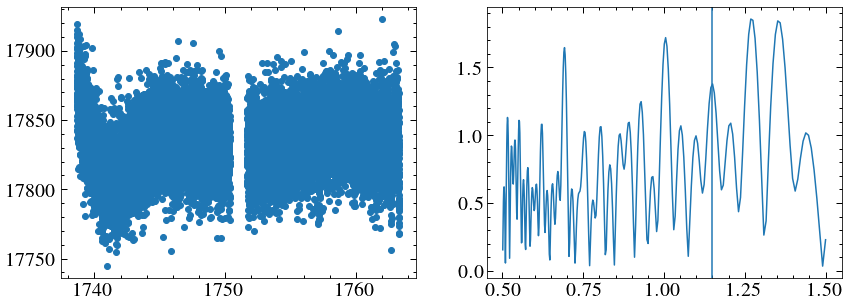

TIC 289779542
1.4304115379397198 d


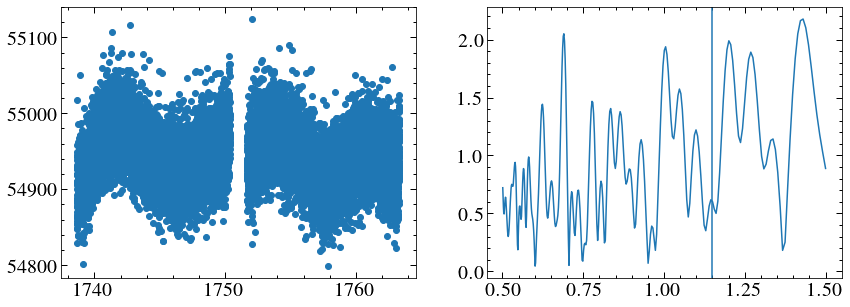

TIC 259773610
0.5703970025722354 d


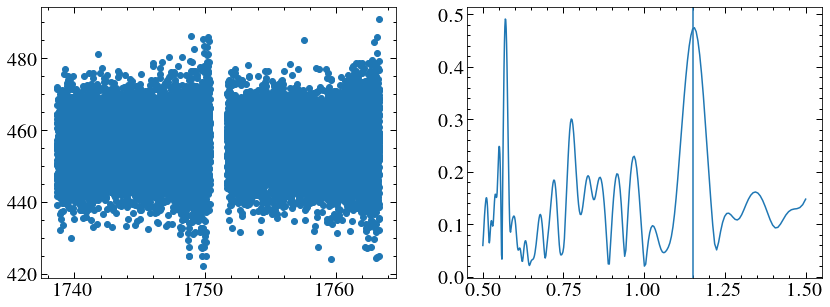

TIC 62331575
1.5 d


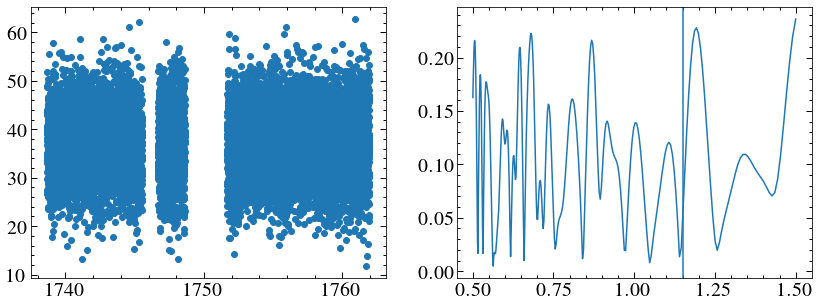

TIC 62137012
1.1291936865667391 d


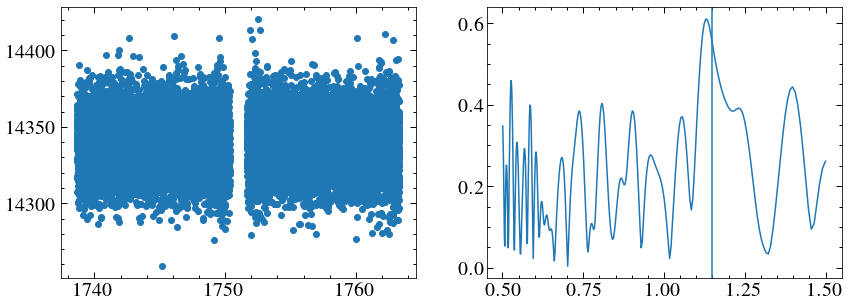

TIC 63531472
1.5 d


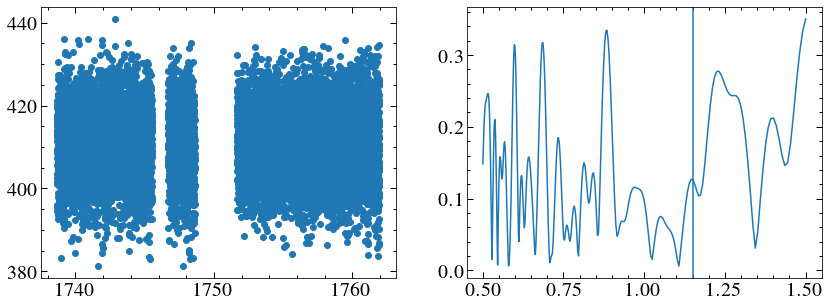

TIC 289436953
1.3373474737157331 d


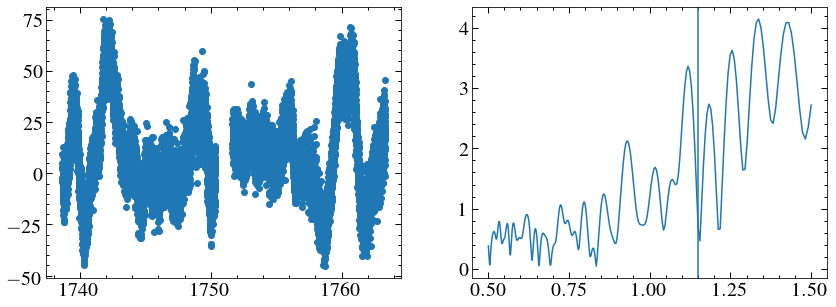

TIC 267267344
0.598055634454946 d


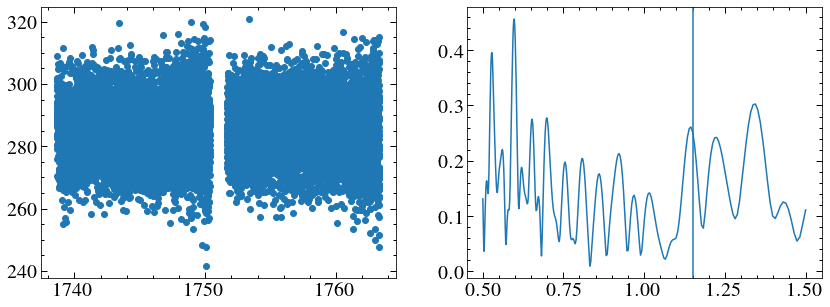

TIC 62337539
1.0388363477763827 d


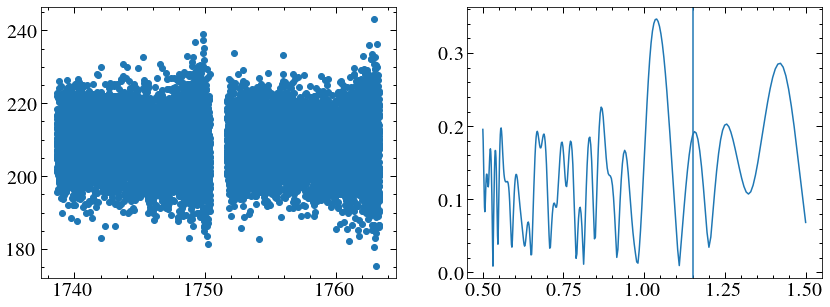

TIC 358623528
1.107761709429604 d


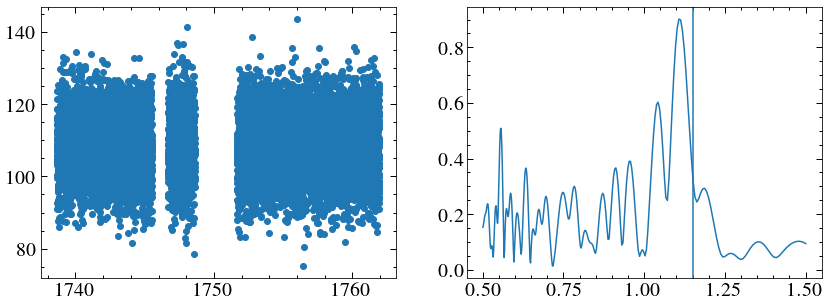

TIC 63222474
1.0432803174503897 d


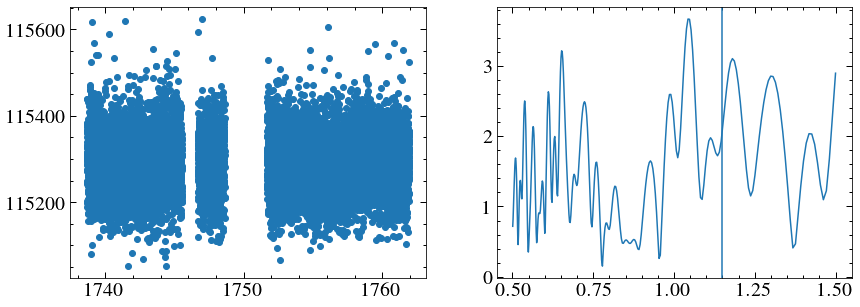

TIC 63908952
1.1515627789761158 d


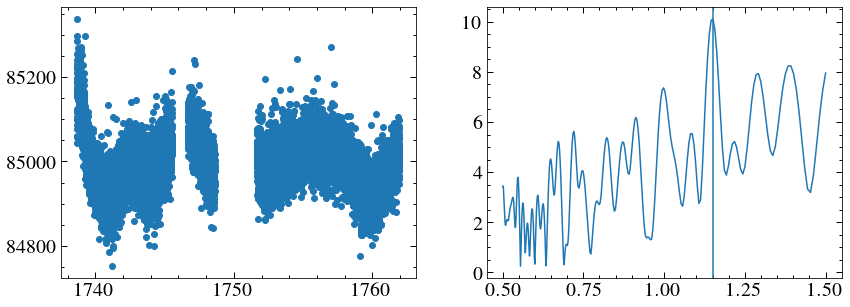

TIC 358183868
1.09900626588228 d


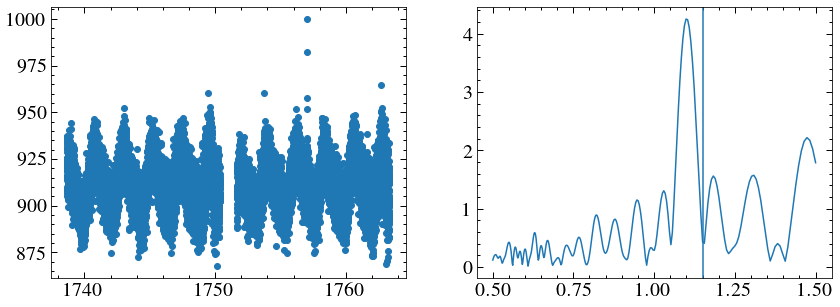

TIC 357875887
0.583898530357239 d


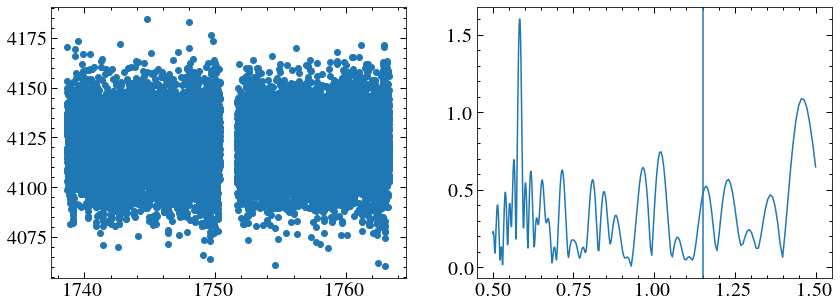

TIC 416687457
1.1867539574600066 d


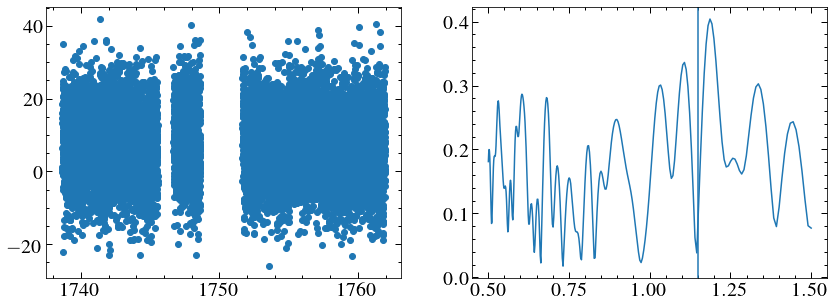

TIC 62236403
1.05748519735457 d


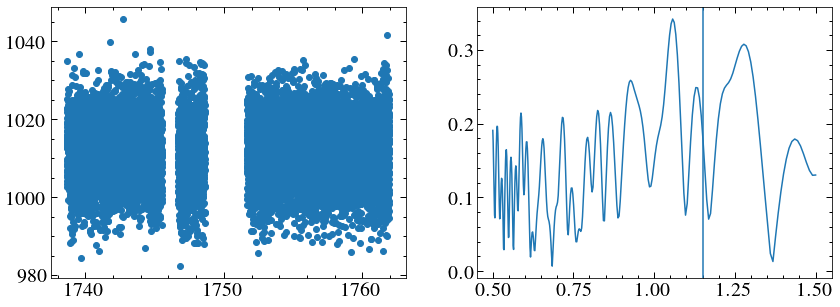

TIC 1976127759
0.5908923908174968 d


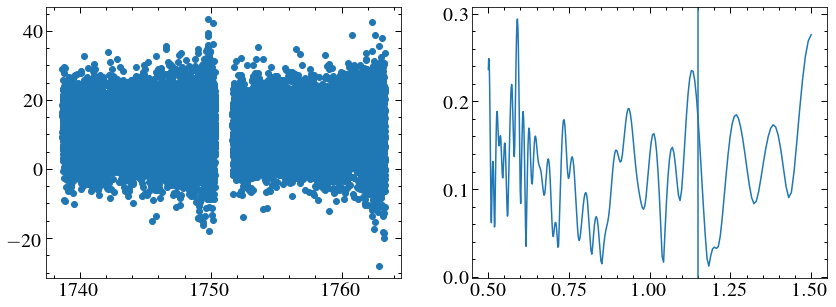

TIC 259778906
0.729640736038843 d


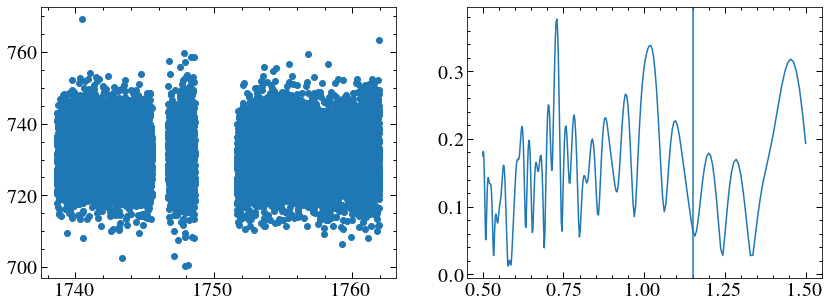

TIC 267281807
1.4140116190633354 d


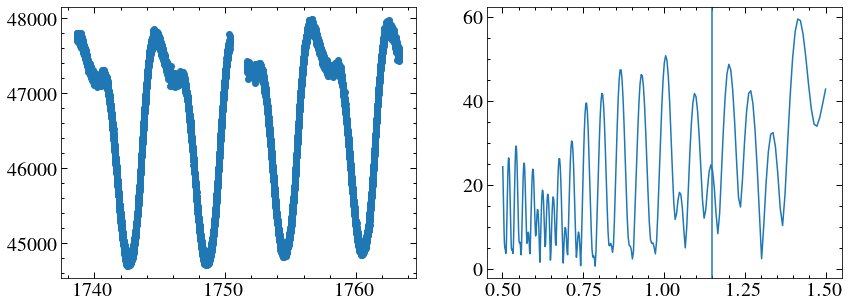

TIC 62774646
1.5 d


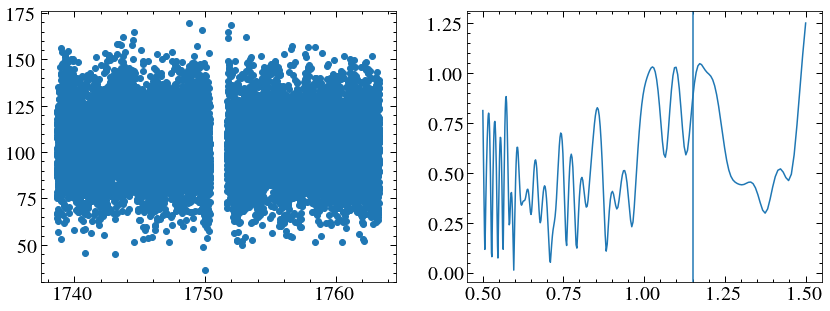

TIC 357874605
1.1777154599872708 d


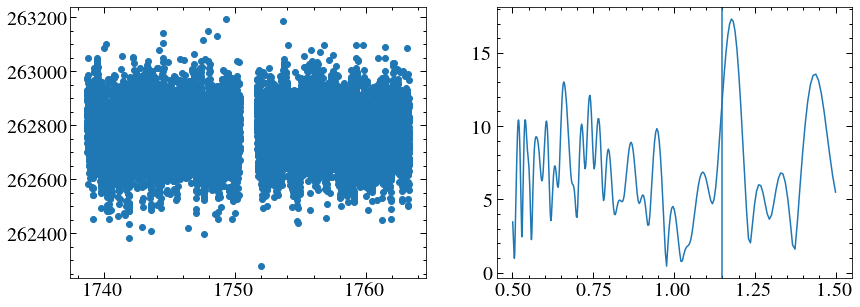

TIC 63853144
1.1989690608596284 d


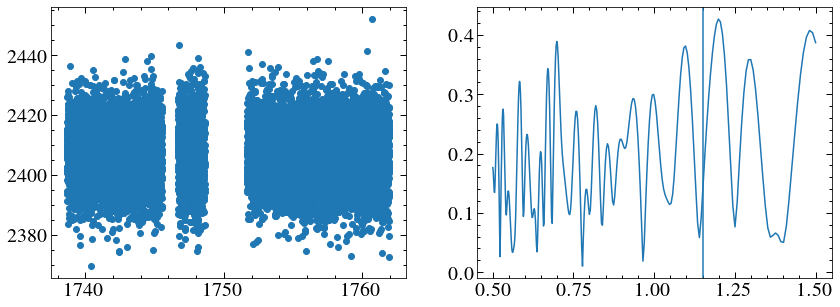

TIC 267145353
0.7556116222554173 d


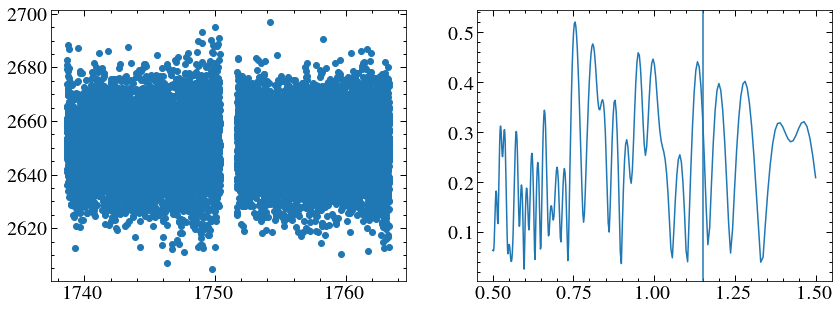

TIC 290232858
0.5894804577312519 d


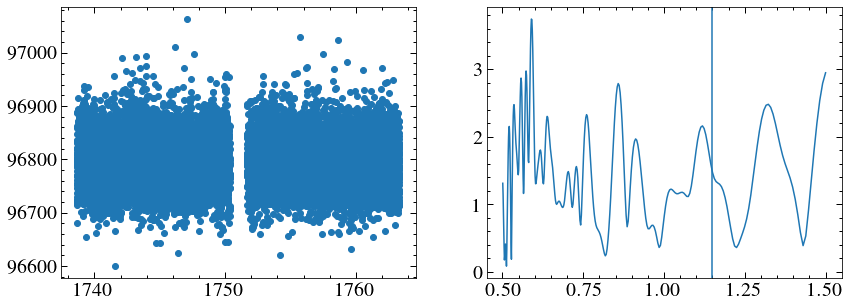

TIC 289435043
0.9849114726314692 d


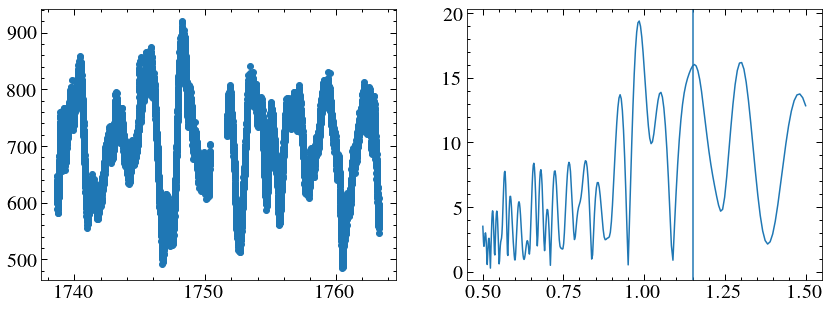

TIC 358742213
1.1556454321461849 d


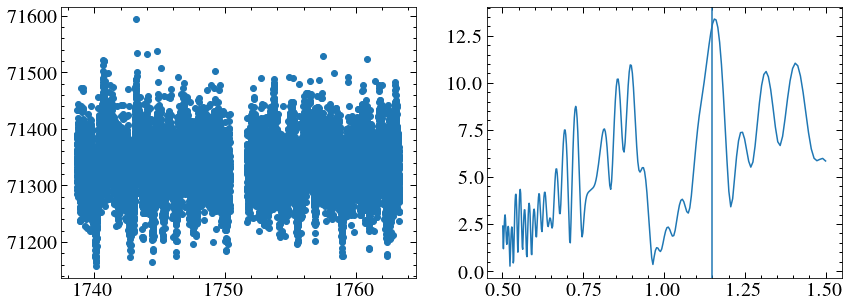

TIC 63441620
1.292049969190414 d


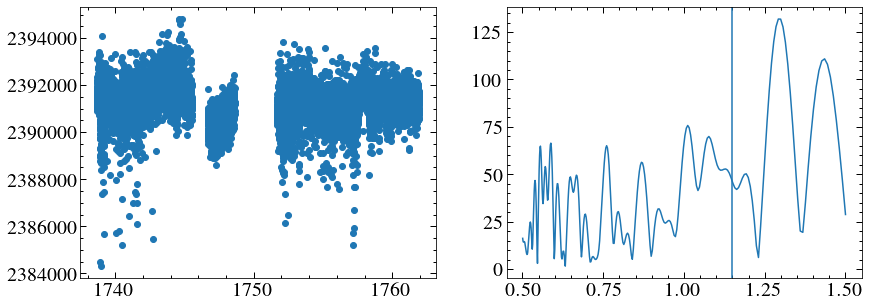

TIC 62332899
0.5414370271211888 d


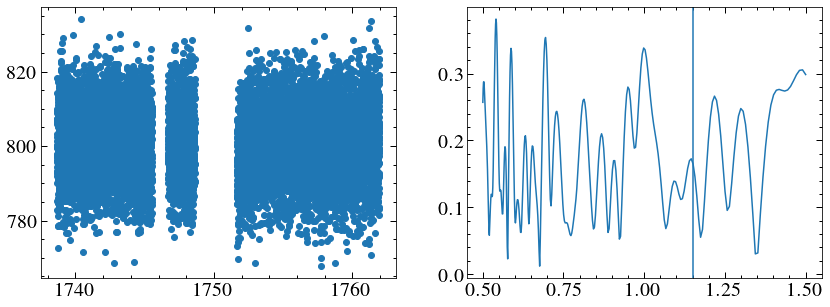

TIC 358634889
0.9943059859033749 d


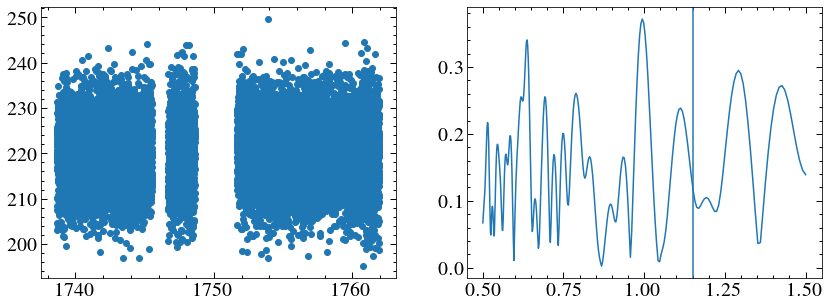

TIC 62859749
1.2640123496742812 d


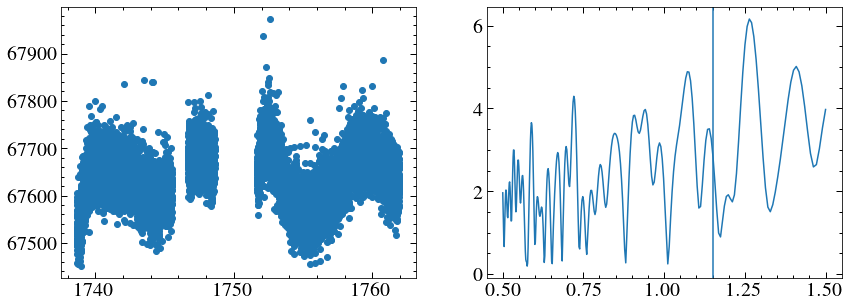

TIC 289903170
1.5 d


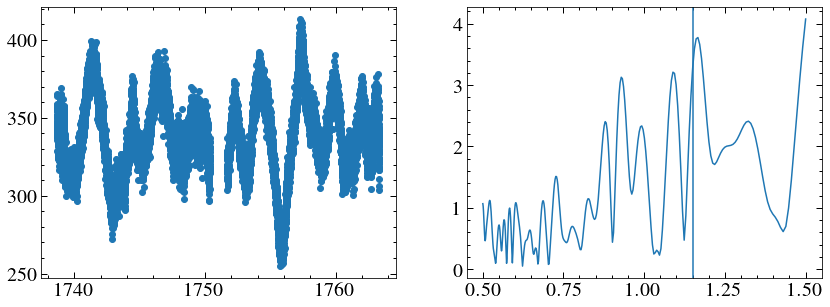

TIC 63223709
0.7206148348461355 d


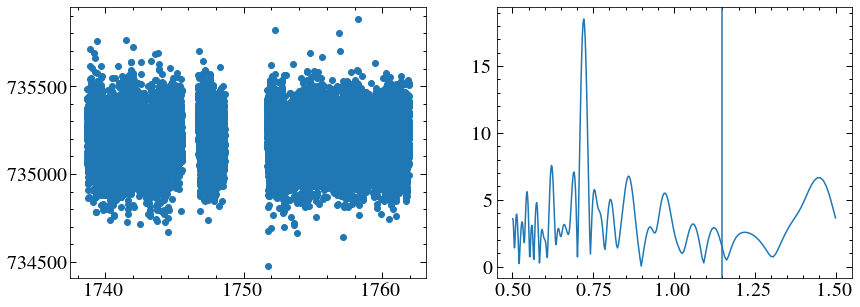

TIC 62598633
1.336518330415528 d


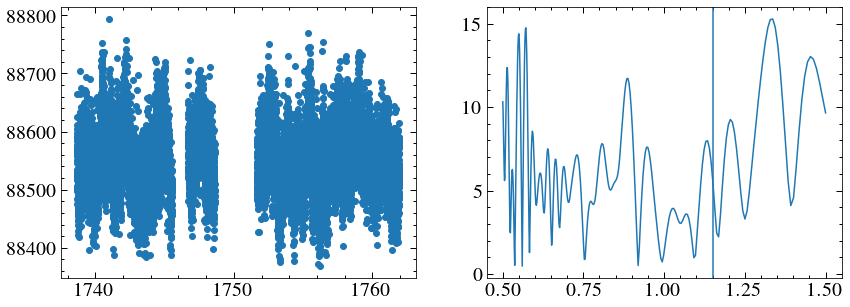

TIC 63445485
1.3924291815075327 d


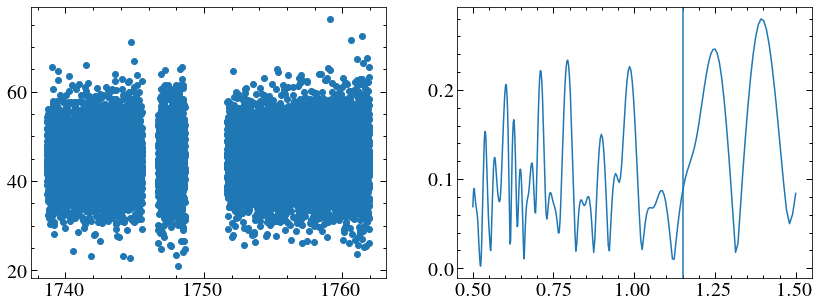

TIC 416749916
0.5664674706756994 d


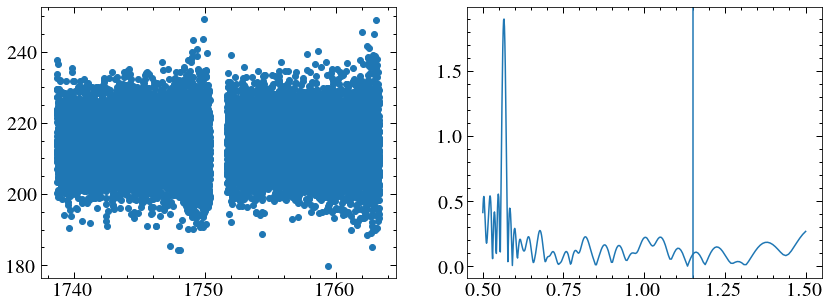

TIC 277247794
0.9233783612857082 d


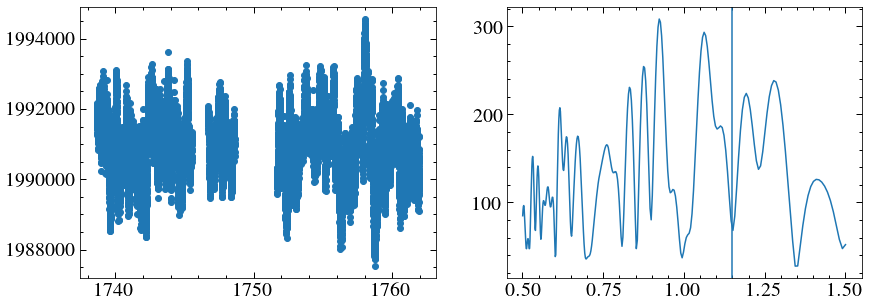

TIC 62775649
1.070392471957649 d


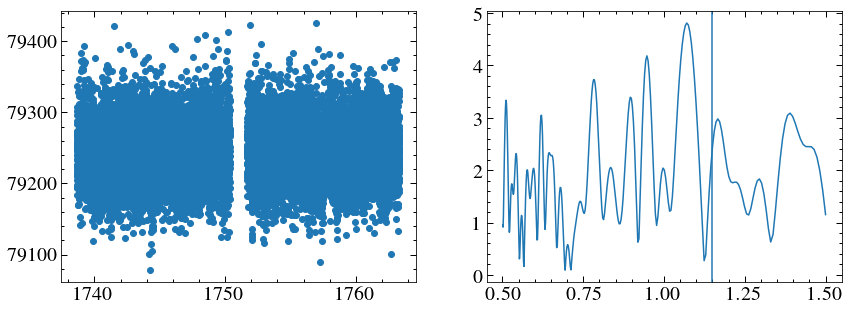

TIC 63328020
0.5525109613986084 d


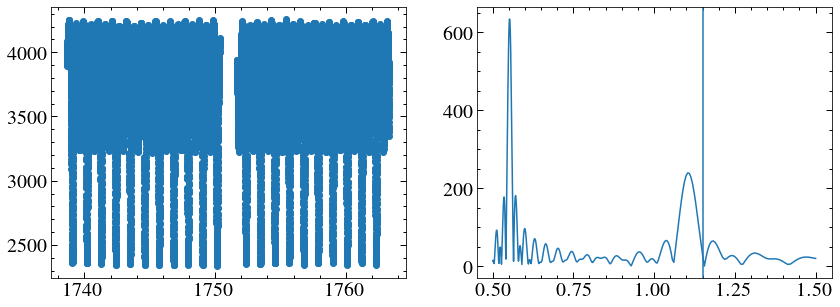

TIC 290277380
1.0703918843307385 d


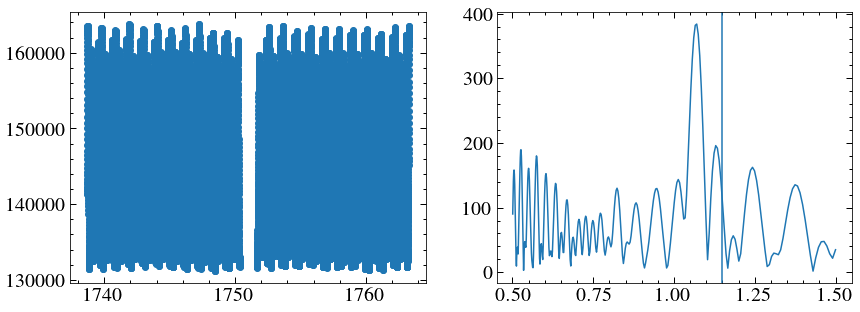

TIC 62778085
1.321359510964179 d


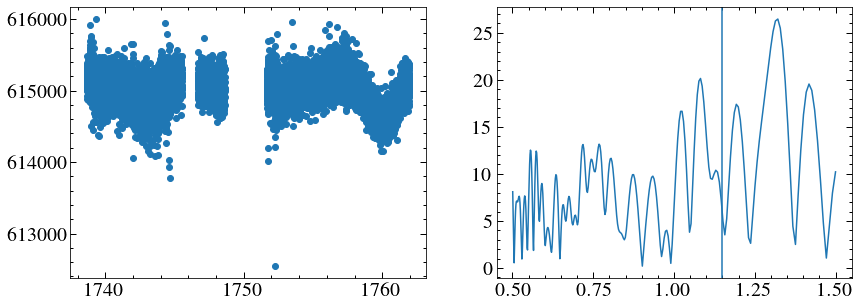

TIC 62690967
0.6333777754247885 d


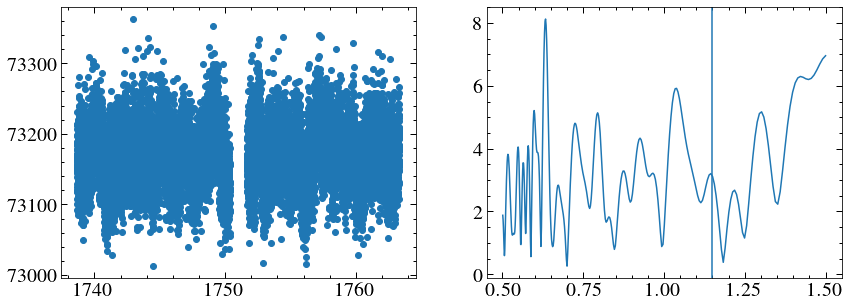

TIC 267147831
0.5951698745985472 d


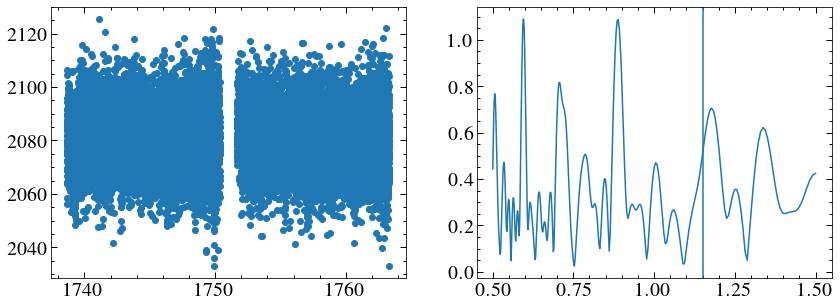

TIC 259285607
1.2367663292445614 d


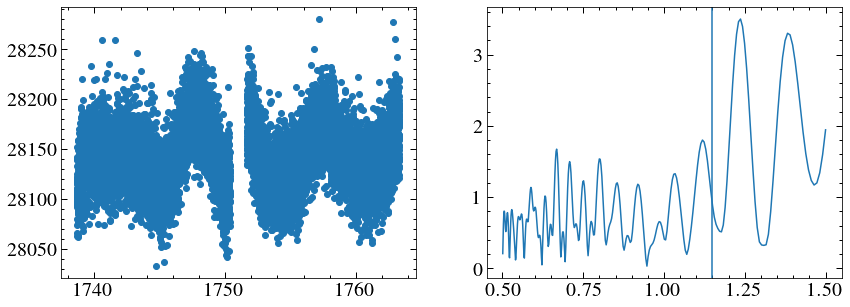

TIC 63227914
1.4092734322511176 d


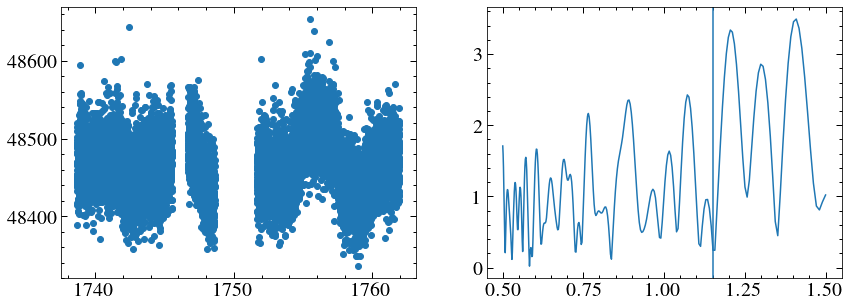

TIC 358736833
0.655249592255767 d


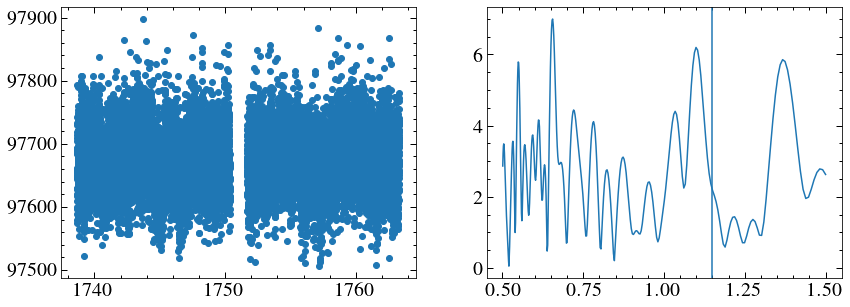

TIC 289956038
0.5144804491860584 d


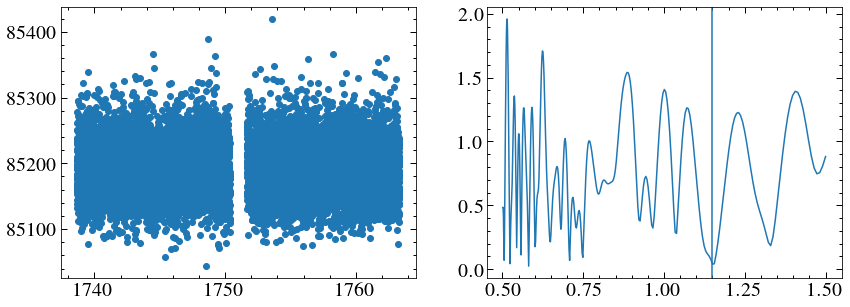

TIC 62508010
0.7606055012550579 d


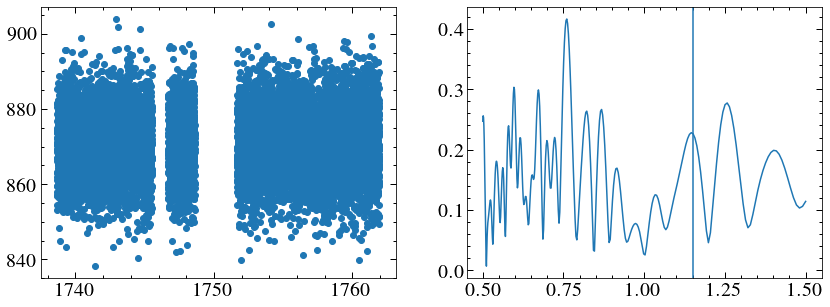

TIC 358738822
0.7397493021828766 d


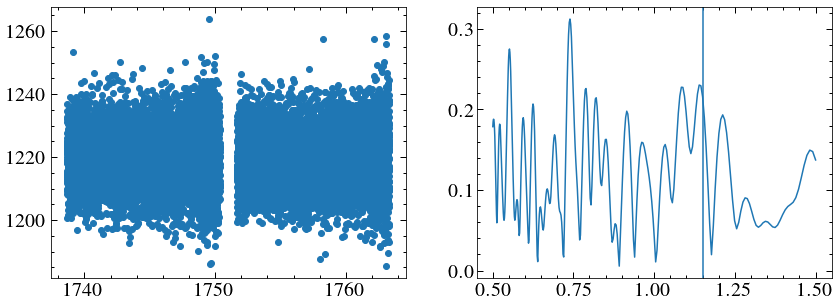

TIC 63152193
1.2571923353048944 d


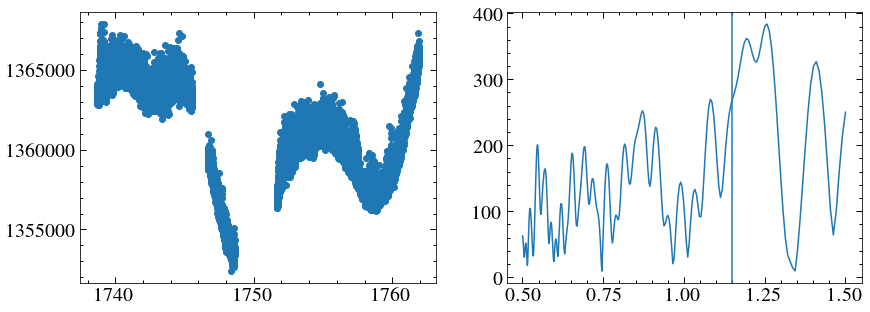

TIC 358739842
0.5188091797019305 d


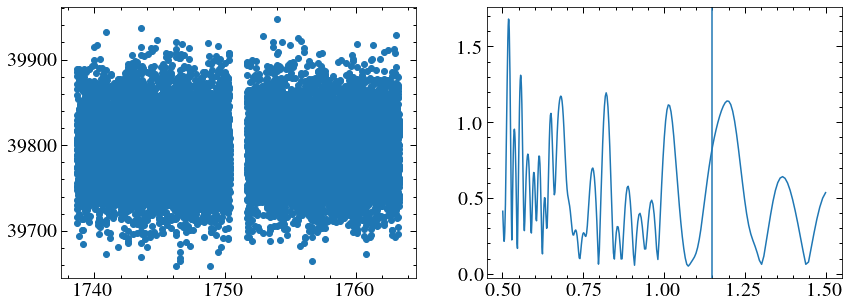

TIC 62949855
0.7656042658157843 d


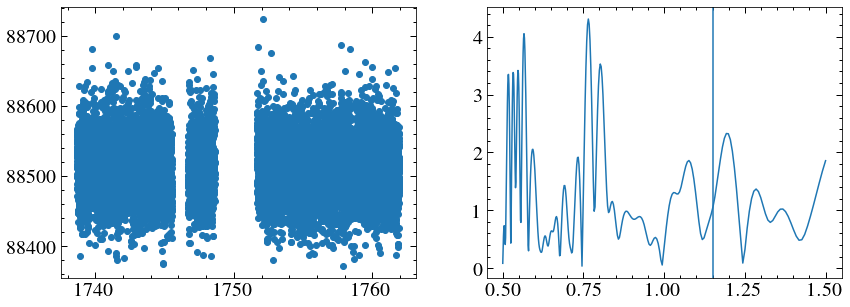

TIC 289903576
0.8023084469059621 d


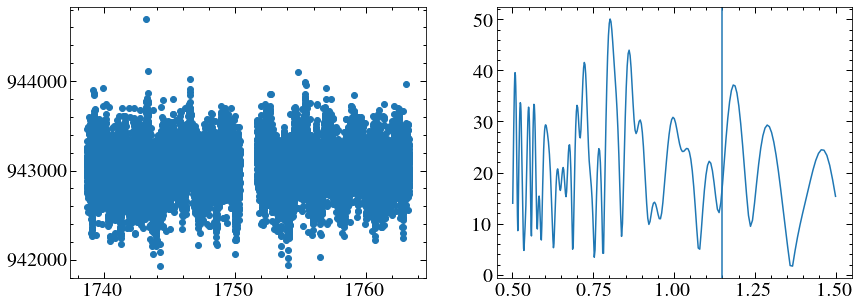

TIC 63445000
0.9458689815274458 d


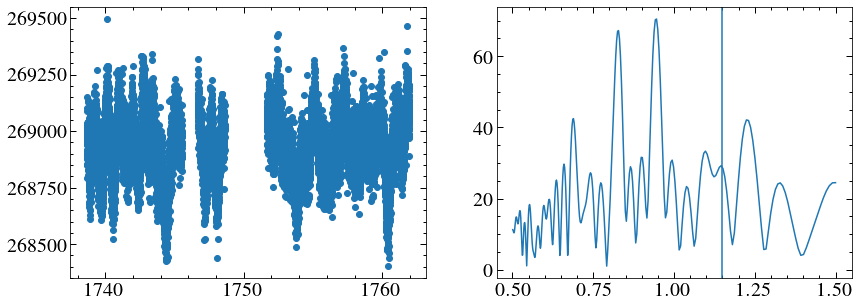

TIC 289901202
0.7442123983998914 d


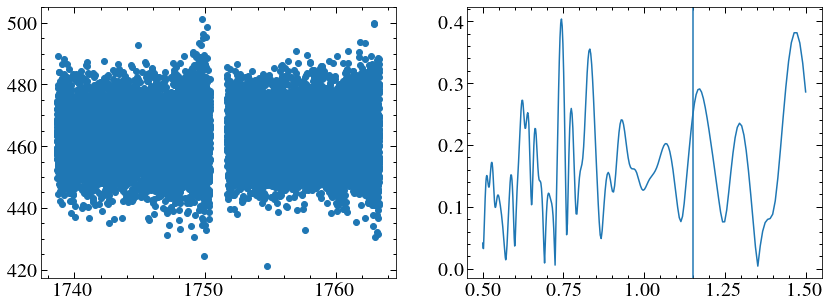

TIC 1976186546
0.8581335723266464 d


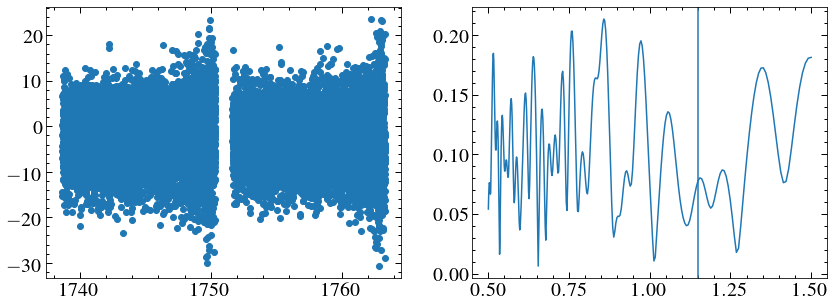

TIC 358323393
1.3139076760344808 d


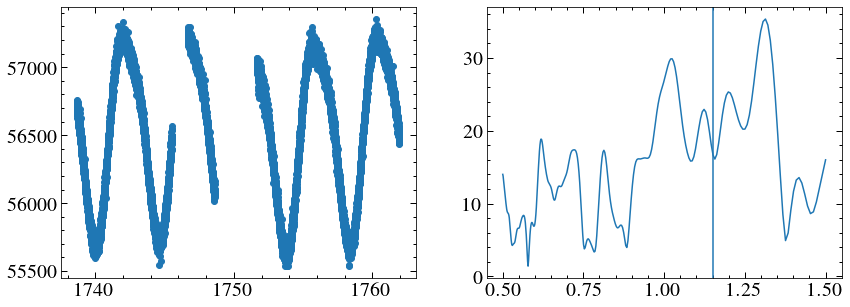

TIC 62247360
0.745993310146139 d


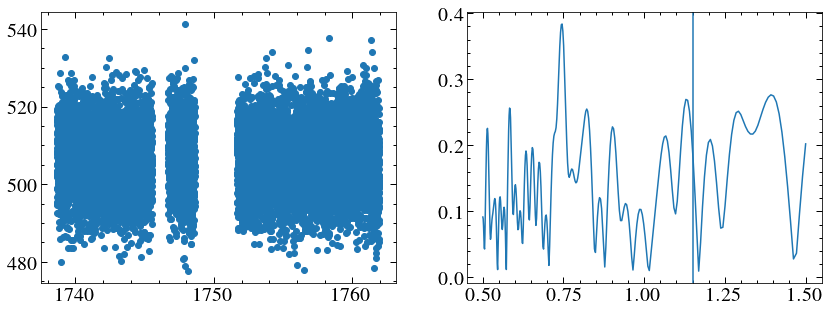

TIC 63529352
0.5999961053788062 d


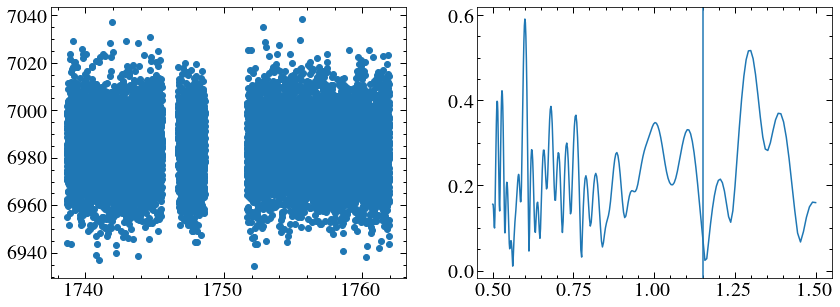

TIC 62872846
0.9943065936758948 d


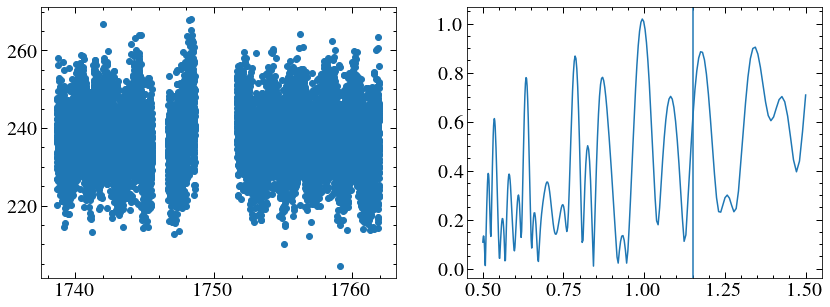

TIC 62329245
0.7412469862487675 d


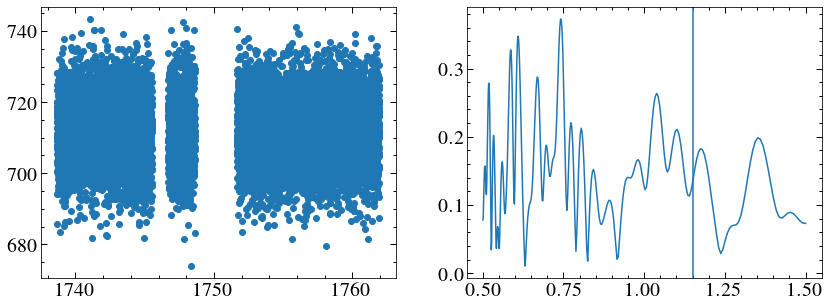

TIC 62871416
1.0159847960166117 d


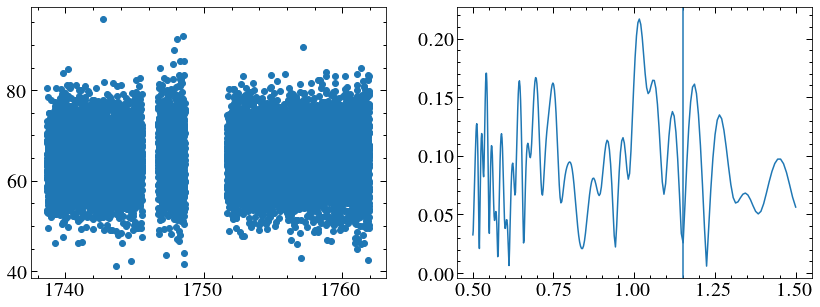

TIC 267152671
1.5 d


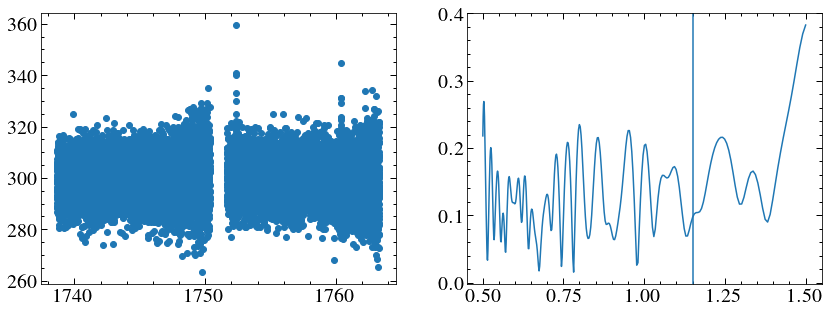

TIC 290228730
1.1890700828980894 d


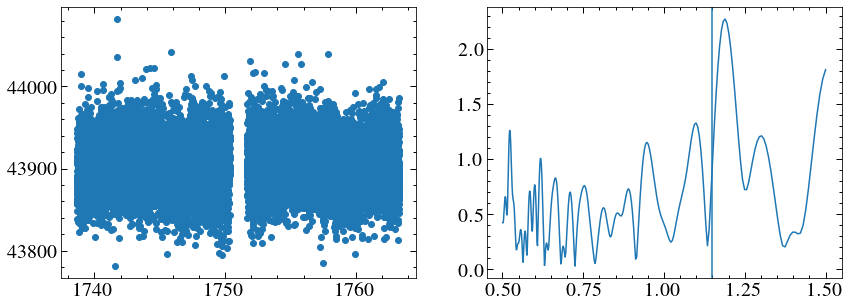

TIC 63711629
1.2114363518513775 d


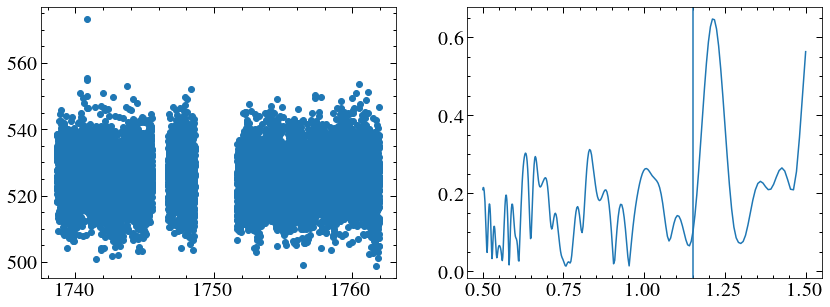

TIC 387477065
0.6939634296403895 d


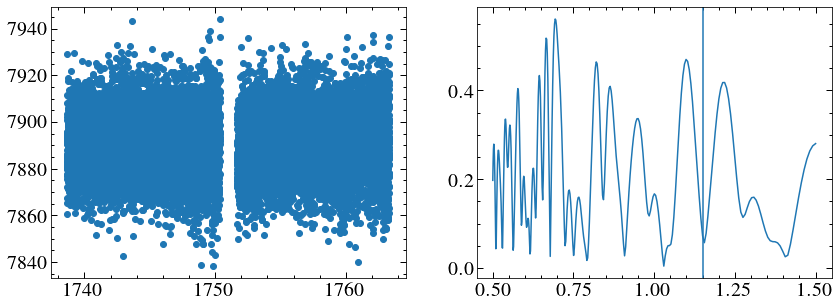

TIC 358626366
1.4178488574329329 d


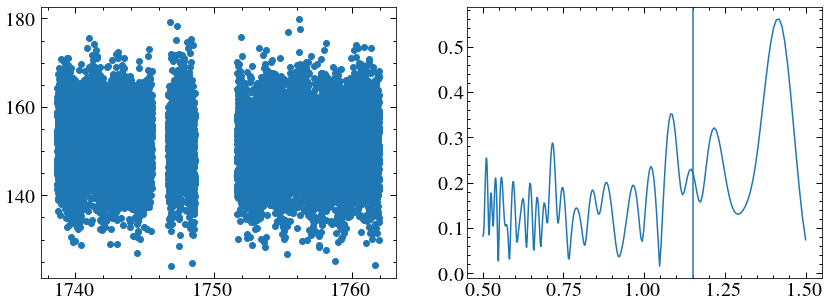

TIC 62600417
1.277877154990942 d


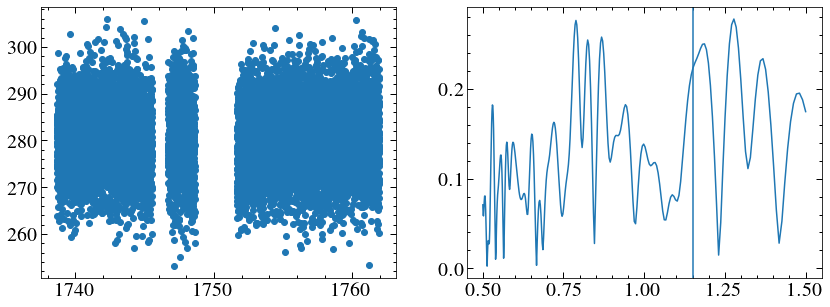

TIC 259779917
1.2571918297051479 d


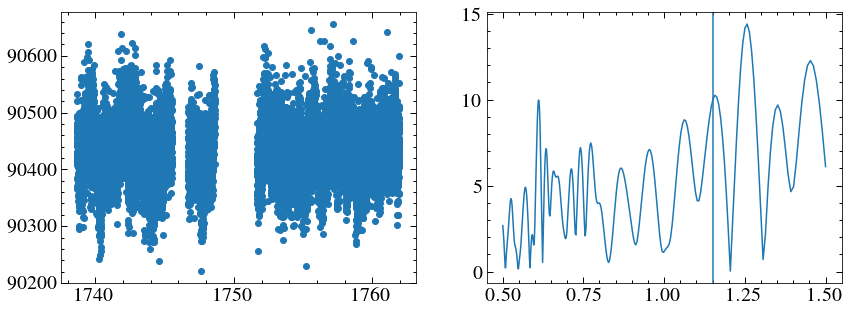

In [61]:
npath = 'nearby_stars/c16_stars/TESS/'
sfiles = os.listdir(npath)
for s in sfiles:
    ft = glob.glob(npath+s+'/*lc.fits')
    if len(ft) >0:
        ft=ft[0]
        data = fits.getdata(ft, 1)
        t, f, e, q = data['TIME'], data['PDCSAP_FLUX'], data['PDCSAP_FLUX_ERR'], data['QUALITY']
        t, f, e = t[q==0], f[q==0], e[q==0]
        plt.subplot(121)
        plt.scatter(t, f)
        print(fits.getheader(ft)['OBJECT'])
        #plt.show()
        lc = lk.LightCurve(time=t, flux=f, flux_err=e ).remove_outliers(sigma=5)
        pg = lc.to_periodogram(oversample_factor=10,minimum_period=0.5*u.day, maximum_period=1.5*u.day)
        plt.subplot(122)
        plt.plot(pg.period, pg.power)
        plt.axvline(1.15)
        print(pg.period_at_max_power)
        plt.show()


In [62]:
#just using stars that are in both, and excluding variables
stars_15 = []
path15 = 'nearby_stars/c15_stars/TESS/'
sfiles = os.listdir(path15)
for s in sfiles:
    ft = glob.glob(path15+s+'/*lc.fits')
    if len(ft) >0:
        ft=ft[0]
        stars_15.append(fits.getheader(ft)['OBJECT'])

stars_both =[]
path16 = 'nearby_stars/c16_stars/TESS/'
sfiles = os.listdir(path16)
for s in sfiles:
    ft = glob.glob(path16+s+'/*lc.fits')
    if len(ft) >0:
        ft=ft[0]
        if fits.getheader(ft)['OBJECT'] in stars_15:
            stars_both.append(fits.getheader(ft)['OBJECT'])

print (stars_both)

['TIC 277732561', 'TIC 387572309', 'TIC 358420231', 'TIC 259570718', 'TIC 63159328', 'TIC 289779542', 'TIC 259773610', 'TIC 62331575', 'TIC 62137012', 'TIC 63531472', 'TIC 267267344', 'TIC 62337539', 'TIC 358623528', 'TIC 63222474', 'TIC 358183868', 'TIC 357875887', 'TIC 416687457', 'TIC 62236403', 'TIC 1976127759', 'TIC 259778906', 'TIC 267281807', 'TIC 62774646', 'TIC 357874605', 'TIC 63853144', 'TIC 267145353', 'TIC 290232858', 'TIC 358742213', 'TIC 63441620', 'TIC 358634889', 'TIC 62859749', 'TIC 63223709', 'TIC 62598633', 'TIC 63445485', 'TIC 416749916', 'TIC 277247794', 'TIC 62775649', 'TIC 63328020', 'TIC 290277380', 'TIC 62778085', 'TIC 62690967', 'TIC 267147831', 'TIC 259285607', 'TIC 358736833', 'TIC 358738822', 'TIC 63152193', 'TIC 358739842', 'TIC 62949855', 'TIC 289903576', 'TIC 63445000', 'TIC 289901202', 'TIC 1976186546', 'TIC 358323393', 'TIC 62247360', 'TIC 63529352', 'TIC 62872846', 'TIC 62329245', 'TIC 62871416', 'TIC 267152671', 'TIC 290228730', 'TIC 63711629', 'TIC

In [85]:
var_list = np.genfromtxt('nearby_stars/vars.txt', dtype=str, delimiter='tab')
var_list

array(['TIC 63445000', 'TIC 358183868', 'TIC 63328020', 'TIC 358323393',
       'TIC 62775649', 'TIC 290277380', 'TIC 358626366', 'TIC 277732561',
       'TIC 62859749', 'TIC 277247794', 'TIC 358742213', 'TIC 259285607',
       'TIC 259285607', 'TIC 259779917', 'TIC 267281807', 'TIC 62598633',
       'TIC 289903576', 'TIC 290277380', 'TIC 62690967', 'TIC 358626366',
       'TIC 277732561', 'TIC 62859749', 'TIC 277247794', 'TIC 358742213',
       'TIC 63152193', 'TIC 62778085', 'TIC 259779917', 'TIC 267281807',
       'TIC 63441620', 'TIC 277732561', 'TIC 259570718', 'TIC 289436953',
       'TIC 63908952', 'TIC 358183868', 'TIC 267281807', 'TIC 289435043',
       'TIC 62859749', 'TIC 289903170', 'TIC 62598633', 'TIC 277247794',
       'TIC 63328020', 'TIC 290277380', 'TIC 62778085', 'TIC 62690967',
       'TIC 259285607', 'TIC 63227914', 'TIC 63152193', 'TIC 63445000',
       'TIC 358323393', 'TIC 259779917'], dtype='<U13')

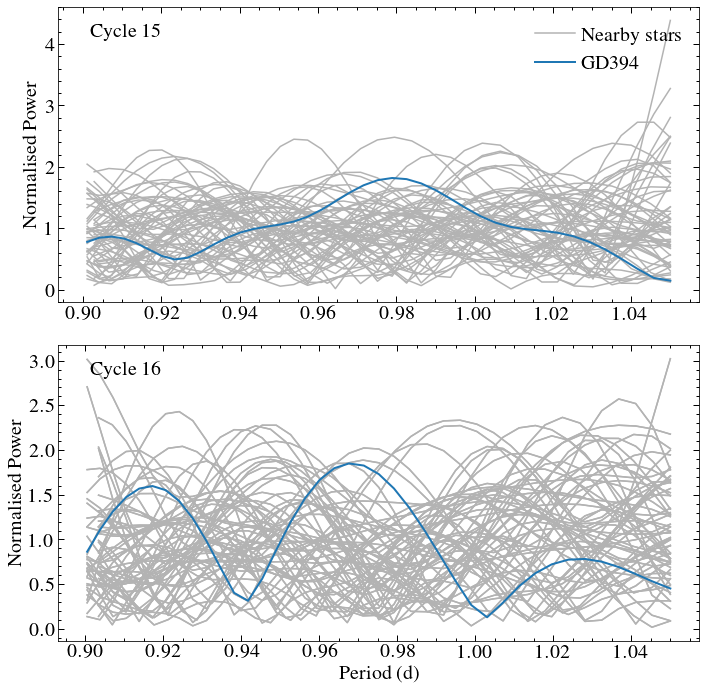

63


In [89]:
target = 'TIC 259773610'
n = 0

min_p = 0.9
max_p = 1.05
plt.figure(figsize=(10,10))
plt.subplot(211)
npath = 'nearby_stars/c15_stars/TESS/'
sfiles = os.listdir(npath)
for s in sfiles:
    ft = glob.glob(npath+s+'/*lc.fits')
    if len(ft) >0:
        ft=ft[0]
        data = fits.getdata(ft, 1)
        t, f, e, q = data['TIME'], data['PDCSAP_FLUX'], data['PDCSAP_FLUX_ERR'], data['QUALITY']
        t, f, e = t[q==0], f[q==0], e[q==0]
        lc = lk.LightCurve(time=t, flux=f, flux_err=e ).remove_outliers(sigma=5)
        pg = lc.to_periodogram(oversample_factor=10,minimum_period=min_p*u.day, maximum_period=max_p*u.day)
        if fits.getheader(ft)['OBJECT'] == target:
            plt.plot(pg.period, pg.power/np.mean(pg.power), zorder=100, label='GD394', lw=2)
        elif fits.getheader(ft)['OBJECT'] in stars_both:# and fits.getheader(ft)['OBJECT'] not in var_list:
            if n == 0:
                plt.plot(pg.period, pg.power/np.mean(pg.power), c='0.7', label = 'Nearby stars')
            else:
                plt.plot(pg.period, pg.power/np.mean(pg.power), c='0.7')
            n +=1
plt.ylabel('Normalised Power')
plt.legend(loc=1)
plt.annotate('Cycle 15', (0.05, 0.9), xycoords='axes fraction')
plt.subplot(212)


npath = 'nearby_stars/c16_stars/TESS/'
sfiles = os.listdir(npath)
for s in sfiles:
    ft = glob.glob(npath+s+'/*lc.fits')
    if len(ft) >0:
        ft=ft[0]
        data = fits.getdata(ft, 1)
        t, f, e, q = data['TIME'], data['PDCSAP_FLUX'], data['PDCSAP_FLUX_ERR'], data['QUALITY']
        t, f, e = t[q==0], f[q==0], e[q==0]
        lc = lk.LightCurve(time=t, flux=f, flux_err=e ).remove_outliers(sigma=5)
        pg = lc.to_periodogram(oversample_factor=10,minimum_period=min_p*u.day, maximum_period=max_p*u.day)
        if fits.getheader(ft)['OBJECT'] == target:
            plt.plot(pg.period, pg.power/np.mean(pg.power), zorder=100, lw=2)
        elif fits.getheader(ft)['OBJECT'] in stars_both:# and fits.getheader(ft)['OBJECT'] not in var_list:
            plt.plot(pg.period, pg.power/np.mean(pg.power), c='0.7')
            plt.plot(pg.period, pg.power/np.mean(pg.power), c='0.7')
            
plt.xlabel('Period (d)')
plt.ylabel('Normalised Power')
plt.annotate('Cycle 16', (0.05, 0.9), xycoords='axes fraction')
plt.tight_layout()
#plt.savefig('nearby_periods.pdf')
plt.show()

print(n)